# Projeto: Análise de dados para pacientes com Acidente Vascular Cerebral

Project: Data analysis for patients with Cerebrovascular Accident

# Apresentação

O presente projeto foi originado para satisfazer a atividade 2 da disciplina de pós-graduação Ciência e Visualização de Dados em Saúde, oferecida no primeiro semestre de 2022, na Unicamp.

O trabalho foi realizado pelo grupo (Tabela 1):

Nome                | RA      | Especialização
--------------------|---------|---------------
Emilia Oliveira     | 262867  | Saúde
Gabriel Garcia      | 216179  | Computação
Robert Tartarotti   | 157173  | Elétrica

<center><b>Tabela 1: participantes</b></center>

# Contextualização da proposta

O objetivo geral do projeto é montar e analisar modelos de prognóstico que realizem a predição de mortalidade de pacientes sintéticos gerados em cenários fictícios diagnosticados com Acidente Vascular Cerebral (AVC) através do uso de três cenários de dados (scenario01, scenario2 e scenario3) disponíveis nos links: https://github.com/santanche/lab2learn/tree/master/data/synthea e https://drive.google.com/drive/u/1/folders/1057xNQ373dZwvASZcX4PFzzHaspeZd8g.

Foi escolhido a análise do prognóstico de morte de pacientes por AVC por esta doença ter uma alta incidência no mundo. De acordo com a Organização Mundial de Saúde (OMS), anualmente 15 milhões de pessoas sofrem de derrame cerebral
[1](https://colab.research.google.com/drive/10zuzOiUzPmoRrRnrsFD5cqJ7V8DIsy1N#scrollTo=2avrEfFzhwXn&line=1&uniqifier=1). Além disto, apresenta alta taxa de mortalidade, variando em torno de 30%-50% [1, 2](https://colab.research.google.com/drive/10zuzOiUzPmoRrRnrsFD5cqJ7V8DIsy1N#scrollTo=2avrEfFzhwXn&line=1&uniqifier=1). É conhecida como a segunda maior causa de morte no Brasil e mundo, como também, a maior responsável por sequelas e deficiências [3](https://colab.research.google.com/drive/10zuzOiUzPmoRrRnrsFD5cqJ7V8DIsy1N#scrollTo=2avrEfFzhwXn&line=1&uniqifier=1).

O AVC ocorre quando há uma interrupção na irrigação sanguínea o que acarreta na morte celular cerebral. Pode acontecer tanto por decorrência de isquemia (bloqueio do fluxo sanguíneo) como também por hemorragia (extravasamento do sangue) [4](https://colab.research.google.com/drive/10zuzOiUzPmoRrRnrsFD5cqJ7V8DIsy1N#scrollTo=2avrEfFzhwXn&line=1&uniqifier=1). Alguns fatores genéticos e ambientais são considerados de risco para este tipo de condição, sendo alguns destes:
*   Hipertensão;
*   Doença cardiovascular prévia;
*   Diabetes;
*   Colesterol alto;
*   Obesidade;
*   Tabagismo;
*   Consumo de álcool em excesso;
*   Alimentação não saudável;
*   Sedentarismo;
*   Entre outros.




## Ferramentas

Para este trabalho, serão usadas basicamente três ferramentas:

*   Google colab
*   Orange
*   Github

Onde o Google colab será usado para apresentar os resultados obtidos (relatório), pegar os dados brutos do github e processá-los, gerando as tabelas, e fazer os comentários principais sobre o projeto.

O Orange será usado para processar as tabelas geradas pelo Google colab e aplicar os modelos de inteligência artificial, de modo a obter o resultado dos modelos criados e analisá-los.

O Github será usado para criar o repositório para armazenar os dados obtidos e tornar o experimento passível de ser reproduzido.



# Metodologia

Os procedimento definidos para realizar o estudo são:

1.   Estabelecer os parâmetros de predição, por exemplo, será predita a morte em que evento, ou quanto tempo a partir de um evento;
2.   Definir quais os dados sobre o paciente que serão usados para a predição;
3.   Construir modelos de aprendizagem de máquina que realizem predições;
4.   Analisar diferentes composições de treinamento e análise do modelo:
     *  um modelo treinado/validado no cenário 1 e testado no cenário 2 e vice-versa;
     *  um modelo treinado e validado com os dados dos dois cenários;
5.   Nos modelos do item 4, verificar se:
     *  houve diferença de resultados?
     *  como analisar e interpretar as diferenças?
6.   Testar diferentes composições de dados sobre o paciente para a predição (por exemplo, quantidade diversificadas de número de itens).

## Bases adotadas para o estudo


*  scenario01
*  scenario02
*  scenario03

## Carregamento de dados

Nesta etapa foram feitos procedimentos no Python para poder carregar os dados originais do github e definir a pasta de saída das tabelas geradas no procedimento.

### Verbose

Definição da variável VERBOSE, usada para definir o que será mostrado durante a execução (todos os dados, ou apenas os importantes).


In [ ]:
# Flag to show all results or only important ones
# Arguments:
#           True  - Show all the results
#           False - Show only important results
VERBOSE = True
CENARIO = 2

### Importando bibliotecas necessárias

Algumas bibliotecas do Python se fazem necessárias para a análise dos dados.

In [ ]:
import os
import zipfile
import pylab as pl
import numpy as np
import pandas as pd
from google.colab import drive
from datetime import datetime, date

### Inicializando o drive

In [ ]:
drive.mount('/content/drive')
files_path = "/content/drive/Shareddrives/Dados e saúde/P2/"
filename = "cenario" + str(CENARIO)
ZIP = False

Mounted at /content/drive


### Importando dados

Importando os dados para serem processados. No caso dos cenários 1 e 2, pegando os dados do github. Para os casos 3 e 4, caso a flag ZIP esteja em True, os dados são pegos diretamente do drive do professor e descompactados em uma pasta do grupo. Caso o ZIP esteja em False, os dados são pegos diretamente da pasta do grupo (se já tiverem lá, i.e., se em algum momento já foi rodado com ZIP igual à True).

In [ ]:
# Para os cenários 1 e 2, pegando do github. Para os cenários 3 e 4, pegando do google drive.

if CENARIO in (1, 2):
  source_data = "https://raw.githubusercontent.com/santanche/lab2learn/master/data/synthea/scenario0" + str(CENARIO) + "/csv"
else:
  if ZIP:
    zip_ref = zipfile.ZipFile("/content/drive/Shareddrives/Dados e saúde/P2/csv_cenario" + str(CENARIO) + "/csv.zip", 'r')
    zip_ref.extractall("/content/drive/Shareddrives/Dados e saúde/P2/csv_cenario" + str(CENARIO) )
    zip_ref.close()
  source_data = "/content/drive/Shareddrives/Dados e saúde/P2/csv_cenario" + str(CENARIO) + "/csv"

Criando as tabelas para serem processadas

In [ ]:
allergies = pd.read_csv(os.path.join(source_data, "allergies.csv"))
careplans = pd.read_csv(os.path.join(source_data, "careplans.csv"))
conditions = pd.read_csv(os.path.join(source_data, "conditions.csv"))
#devices = pd.read_csv(os.path.join(source_data, "devices.csv"))
encounter = pd.read_csv(os.path.join(source_data, "encounters.csv"))
immunications = pd.read_csv(os.path.join(source_data, "immunizations.csv"))
medications = pd.read_csv(os.path.join(source_data, "medications.csv"))
observations = pd.read_csv(os.path.join(source_data, "observations.csv"))
patient = pd.read_csv(os.path.join(source_data, "patients.csv"))
# procedure = pd.read_csv(os.path.join(source_data, "procedures.csv"))

if VERBOSE:
  print("\n\nDados para allergies")
  display(allergies)
  print("\n\nDados para careplans")
  display(careplans)
  print("\n\nDados para conditions")
  display(conditions)
  #print("\n\nDados para devices")
  #display(devices)
  print("\n\nDados para encounter")
  display(encounter)
  print("\n\nDados para immunications")
  display(immunications)
  print("\n\nDados para medications")
  display(medications)
  print("\n\nDados para observations")
  display(observations)
  print("\n\nDados para patient")
  display(patient)
  # print("\n\nDados para procedure")
  # display(procedure)




Dados para allergies


,START,STOP,PATIENT,ENCOUNTER,CODE,SYSTEM,DESCRIPTION,TYPE,CATEGORY,REACTION1,DESCRIPTION1,SEVERITY1,REACTION2,DESCRIPTION2,SEVERITY2
0,2013-04-29,NaN,bb37561b-ba65-7c47-db5b-0641bca883b4,2b35ca8d-643a-f176-3fab-488e1ed4be4b,84489001,Unknown,Mold (organism),allergy,environment,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-04-29,NaN,bb37561b-ba65-7c47-db5b-0641bca883b4,2b35ca8d-643a-f176-3fab-488e1ed4be4b,260147004,Unknown,House dust mite (organism),allergy,environment,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-04-29,NaN,bb37561b-ba65-7c47-db5b-0641bca883b4,2b35ca8d-643a-f176-3fab-488e1ed4be4b,264287008,Unknown,Animal dander (substance),allergy,environment,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-04-29,NaN,bb37561b-ba65-7c47-db5b-0641bca883b4,2b35ca8d-643a-f176-3fab-488e1ed4be4b,256277009,Unknown,Grass pollen (substance),allergy,environment,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-04-29,NaN,bb37561b-ba65-7c47-db5b-0641bca883b4,2b35ca8d-643a-f176-3fab-488e1ed4be4b,782576004,Unknown,Tree pollen (substance),allergy,environment,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,2007-03-25,NaN,32d8410a-cc4b-4d8b-601d-3ad2b8ef912b,e6c4e9a1-eae2-f160-f8be-21705b8c4801,1191,Unknown,Aspirin,allergy,medication,21522001.0,Abdominal pain (finding),MODERATE,NaN,NaN,NaN
833,2007-03-25,NaN,32d8410a-cc4b-4d8b-601d-3ad2b8ef912b,e6c4e9a1-eae2-f160-f8be-21705b8c4801,3718001,Unknown,Cow's milk (substance),allergy,food,NaN,NaN,NaN,NaN,NaN,NaN
834,2007-03-25,NaN,32d8410a-cc4b-4d8b-601d-3ad2b8ef912b,e6c4e9a1-eae2-f160-f8be-21705b8c4801,735971005,Unknown,Fish (substance),allergy,food,267036007.0,Dyspnea (finding),MODERATE,271807003.0,Eruption of skin (disorder),MILD
835,1966-04-27,NaN,324524ae-8a76-b5bb-8fb3-3a3bac8572d2,baf79bde-1cbf-3089-9dfb-2123c8192610,264287008,Unknown,Animal dander (substance),allergy,environment,878820003.0,Rhinoconjunctivitis (disorder),MODERATE,NaN,NaN,NaN




Dados para careplans


,Id,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
0,9f0b8f0d-b53e-0d51-c7d2-00f51f81ac22,2013-04-12,NaN,bb37561b-ba65-7c47-db5b-0641bca883b4,d787f2af-f305-1141-e964-d2c6fe25def8,384758001,Self-care interventions (procedure),NaN,NaN
1,7b07b4ca-3b26-08da-b11d-b67535c8a172,2013-03-25,NaN,62fc8f1c-cbca-4143-bcda-8075dd42eaf0,ba15f24d-56e6-26c4-ac49-540a56977c54,699728000,Asthma self management,233678006.0,Childhood asthma
2,4b1b784c-ff4d-12e6-250f-aecd29450187,2014-09-02,2014-10-01,62fc8f1c-cbca-4143-bcda-8075dd42eaf0,407507a9-4c15-0c66-f05a-fc0e5e708698,773513001,Physiotherapy care plan (record artifact),44465007.0,Sprain of ankle
3,a5fe6f4b-dee9-f182-2306-d2c097093100,2014-12-19,2015-01-22,bb37561b-ba65-7c47-db5b-0641bca883b4,6e07750a-8d49-aa3a-1342-384f71e02085,385691007,Fracture care,16114001.0,Fracture of ankle
4,8f4032eb-ba94-3b79-e1c7-6b9b52302854,2021-10-25,2021-11-23,62fc8f1c-cbca-4143-bcda-8075dd42eaf0,fe041d24-e944-4b31-f398-53aafe87cc65,773513001,Physiotherapy care plan (record artifact),44465007.0,Sprain of ankle
...,...,...,...,...,...,...,...,...,...
3557,2e8fd6b5-b998-c7ca-7070-86ae1b0e41ea,2016-11-04,2016-11-05,684d3fe7-39ec-20f2-1554-af111311e8e9,09a355ee-1862-9df8-e5b0-1cab0a3ae5cb,736353004,Inpatient care plan (record artifact),88805009.0,Chronic congestive heart failure (disorder)
3558,62eecff1-1152-24b0-2a16-ba4ee15ee480,2018-08-26,2018-08-27,684d3fe7-39ec-20f2-1554-af111311e8e9,88543582-47fa-855e-8038-e92fec121947,736353004,Inpatient care plan (record artifact),88805009.0,Chronic congestive heart failure (disorder)
3559,aef3f792-c628-03f2-771c-d5f37845e8bb,2019-05-10,NaN,684d3fe7-39ec-20f2-1554-af111311e8e9,8ed90cfc-21fb-f9d8-a1e1-6e87ef6d6a43,736353004,Inpatient care plan (record artifact),88805009.0,Chronic congestive heart failure (disorder)
3560,1442b721-3383-10e1-6b89-eb2f2b2a0da1,1992-08-08,NaN,a651d55c-bdb4-3786-8d1a-41b38e45a0ed,02f74265-33da-1c29-1d82-7e327768c39f,734163000,Care plan (record artifact),73430006.0,Sleep apnea (disorder)




Dados para conditions


,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,2012-07-07,2012-08-13,62fc8f1c-cbca-4143-bcda-8075dd42eaf0,453b2ff7-04bf-dc49-9e01-55f2d2bc8e9a,65363002,Otitis media
1,2013-03-25,NaN,62fc8f1c-cbca-4143-bcda-8075dd42eaf0,ba15f24d-56e6-26c4-ac49-540a56977c54,233678006,Childhood asthma
2,2013-02-08,2013-02-15,bb37561b-ba65-7c47-db5b-0641bca883b4,c9e395f0-b9f5-5b3d-77a1-87a8129132dd,444814009,Viral sinusitis (disorder)
3,2013-04-11,2013-04-11,bb37561b-ba65-7c47-db5b-0641bca883b4,166ccc3e-ed17-9b09-ae58-7fa2fe95c4ff,241929008,Acute allergic reaction
4,2013-08-19,2013-08-28,62fc8f1c-cbca-4143-bcda-8075dd42eaf0,e1c5c294-0cf4-22fe-a820-f6c8126c44e4,195662009,Acute viral pharyngitis (disorder)
...,...,...,...,...,...,...
34781,2020-01-29,2021-02-03,a651d55c-bdb4-3786-8d1a-41b38e45a0ed,4d3c5462-18f2-2de0-6b60-7727fdaed3a5,160904001,Part-time employment (finding)
34782,2021-02-03,2022-02-09,a651d55c-bdb4-3786-8d1a-41b38e45a0ed,f50399c8-cfff-3156-55ad-f1e27457137b,160904001,Part-time employment (finding)
34783,2022-02-09,NaN,a651d55c-bdb4-3786-8d1a-41b38e45a0ed,1f3db280-250f-5eeb-a60f-fffe64018465,160903007,Full-time employment (finding)
34784,2022-02-09,NaN,a651d55c-bdb4-3786-8d1a-41b38e45a0ed,1f3db280-250f-5eeb-a60f-fffe64018465,423315002,Limited social contact (finding)




Dados para encounter


,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,3d9c0850-a0e1-da8a-b3ff-b3a728b0989d,2022-04-23T00:53:05Z,2022-04-23T01:08:05Z,623336a5-3e7b-57c7-dbd3-b77434c1e1c7,2e4ce585-5e2d-3116-b35f-36204d7c82df,8a96ee37-81bd-3384-a5e6-5174f24fa3bc,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,wellness,410620009,Well child visit (procedure),99.01,776.14,0.00,NaN,NaN
1,22823b5b-82b5-f6e9-d254-b31bd665a408,2012-05-16T23:05:43Z,2012-05-16T23:20:43Z,bb37561b-ba65-7c47-db5b-0641bca883b4,704cb459-7280-307f-b574-85b67bbe3c20,b2e613ef-77cd-350c-ab62-50f7184e1831,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,wellness,410620009,Well child visit (procedure),99.01,1739.41,0.00,NaN,NaN
2,453b2ff7-04bf-dc49-9e01-55f2d2bc8e9a,2012-07-07T11:12:28Z,2012-07-07T11:27:28Z,62fc8f1c-cbca-4143-bcda-8075dd42eaf0,6b57af4a-5757-31a8-9916-5744531df0ad,9d0ab1c5-7394-3c6a-81d1-2ca78155defd,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,outpatient,185345009,Encounter for symptom,96.72,131.70,0.00,65363002.0,Otitis media
3,89d19589-5ca3-0523-c052-ca0dffa69f72,2012-08-13T11:12:28Z,2012-08-13T11:27:28Z,62fc8f1c-cbca-4143-bcda-8075dd42eaf0,c243d20b-cfb6-3a93-ab8c-366093c7afa3,59bb12d2-8016-3260-be7b-bf15cc80dbd6,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,wellness,410620009,Well child visit (procedure),99.01,709.31,0.00,NaN,NaN
4,09d35e11-3340-bbd9-2896-cc619436b94b,2012-07-18T23:05:43Z,2012-07-18T23:20:43Z,bb37561b-ba65-7c47-db5b-0641bca883b4,704cb459-7280-307f-b574-85b67bbe3c20,b2e613ef-77cd-350c-ab62-50f7184e1831,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,wellness,410620009,Well child visit (procedure),99.01,779.01,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55280,4caa730b-927f-5b75-234d-a60cca1189f2,2019-01-23T13:16:07Z,2019-01-23T13:31:07Z,a651d55c-bdb4-3786-8d1a-41b38e45a0ed,b5f856a0-ad9c-3ead-a43c-b3731fb329a3,4f0b980b-07db-3ba6-837f-72875d0266b0,7caa7254-5050-3b5e-9eae-bd5ea30e809c,wellness,162673000,General examination of patient (procedure),99.01,822.57,658.05,NaN,NaN
55281,4d3c5462-18f2-2de0-6b60-7727fdaed3a5,2020-01-29T13:16:07Z,2020-01-29T13:31:07Z,a651d55c-bdb4-3786-8d1a-41b38e45a0ed,b5f856a0-ad9c-3ead-a43c-b3731fb329a3,4f0b980b-07db-3ba6-837f-72875d0266b0,7caa7254-5050-3b5e-9eae-bd5ea30e809c,wellness,162673000,General examination of patient (procedure),99.01,958.57,766.85,NaN,NaN
55282,f50399c8-cfff-3156-55ad-f1e27457137b,2021-02-03T13:16:07Z,2021-02-03T13:31:07Z,a651d55c-bdb4-3786-8d1a-41b38e45a0ed,b5f856a0-ad9c-3ead-a43c-b3731fb329a3,4f0b980b-07db-3ba6-837f-72875d0266b0,7caa7254-5050-3b5e-9eae-bd5ea30e809c,wellness,162673000,General examination of patient (procedure),99.01,962.61,770.08,NaN,NaN
55283,1f3db280-250f-5eeb-a60f-fffe64018465,2022-02-09T13:16:07Z,2022-02-09T13:31:07Z,a651d55c-bdb4-3786-8d1a-41b38e45a0ed,b5f856a0-ad9c-3ead-a43c-b3731fb329a3,4f0b980b-07db-3ba6-837f-72875d0266b0,7caa7254-5050-3b5e-9eae-bd5ea30e809c,wellness,162673000,General examination of patient (procedure),99.01,1501.30,1201.03,NaN,NaN




Dados para immunications


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST
0,2022-04-23T00:53:05Z,623336a5-3e7b-57c7-dbd3-b77434c1e1c7,3d9c0850-a0e1-da8a-b3ff-b3a728b0989d,8,Hep B adolescent or pediatric,136.0
1,2012-05-16T23:05:43Z,bb37561b-ba65-7c47-db5b-0641bca883b4,22823b5b-82b5-f6e9-d254-b31bd665a408,49,Hib (PRP-OMP),136.0
2,2012-05-16T23:05:43Z,bb37561b-ba65-7c47-db5b-0641bca883b4,22823b5b-82b5-f6e9-d254-b31bd665a408,119,rotavirus monovalent,136.0
3,2012-05-16T23:05:43Z,bb37561b-ba65-7c47-db5b-0641bca883b4,22823b5b-82b5-f6e9-d254-b31bd665a408,10,IPV,136.0
4,2012-05-16T23:05:43Z,bb37561b-ba65-7c47-db5b-0641bca883b4,22823b5b-82b5-f6e9-d254-b31bd665a408,20,DTaP,136.0
...,...,...,...,...,...,...
16889,2019-01-23T13:16:07Z,a651d55c-bdb4-3786-8d1a-41b38e45a0ed,4caa730b-927f-5b75-234d-a60cca1189f2,140,Influenza seasonal injectable preservative ...,136.0
16890,2020-01-29T13:16:07Z,a651d55c-bdb4-3786-8d1a-41b38e45a0ed,4d3c5462-18f2-2de0-6b60-7727fdaed3a5,140,Influenza seasonal injectable preservative ...,136.0
16891,2020-01-29T13:16:07Z,a651d55c-bdb4-3786-8d1a-41b38e45a0ed,4d3c5462-18f2-2de0-6b60-7727fdaed3a5,113,Td (adult) preservative free,136.0
16892,2021-02-03T13:16:07Z,a651d55c-bdb4-3786-8d1a-41b38e45a0ed,f50399c8-cfff-3156-55ad-f1e27457137b,140,Influenza seasonal injectable preservative ...,136.0




Dados para medications


,START,STOP,PATIENT,PAYER,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION
0,2012-07-07T11:12:28Z,2012-07-21T11:12:28Z,62fc8f1c-cbca-4143-bcda-8075dd42eaf0,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,453b2ff7-04bf-dc49-9e01-55f2d2bc8e9a,308192,Amoxicillin 500 MG Oral Tablet,7.19,0.0,1,7.19,NaN,NaN
1,2012-07-07T11:12:28Z,2012-07-21T11:12:28Z,62fc8f1c-cbca-4143-bcda-8075dd42eaf0,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,453b2ff7-04bf-dc49-9e01-55f2d2bc8e9a,198405,Ibuprofen 100 MG Oral Tablet,13.07,0.0,1,13.07,NaN,NaN
2,2013-03-25T11:12:28Z,2013-08-12T11:12:28Z,62fc8f1c-cbca-4143-bcda-8075dd42eaf0,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,ba15f24d-56e6-26c4-ac49-540a56977c54,895994,120 ACTUAT Fluticasone propionate 0.044 MG/ACT...,32.62,0.0,4,130.48,233678006.0,Childhood asthma
3,2013-03-25T11:12:28Z,2013-08-12T11:12:28Z,62fc8f1c-cbca-4143-bcda-8075dd42eaf0,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,ba15f24d-56e6-26c4-ac49-540a56977c54,2123111,NDA020503 200 ACTUAT Albuterol 0.09 MG/ACTUAT ...,291.98,0.0,4,1167.92,233678006.0,Childhood asthma
4,2013-02-08T06:05:43Z,2013-02-15T06:05:43Z,bb37561b-ba65-7c47-db5b-0641bca883b4,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,c9e395f0-b9f5-5b3d-77a1-87a8129132dd,562251,Amoxicillin 250 MG / Clavulanate 125 MG Oral T...,32.56,0.0,1,32.56,444814009.0,Viral sinusitis (disorder)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51166,2018-01-17T13:16:07Z,2019-01-23T13:16:07Z,a651d55c-bdb4-3786-8d1a-41b38e45a0ed,7caa7254-5050-3b5e-9eae-bd5ea30e809c,2ae23a46-663a-3b24-64ff-698e176aba5a,314076,lisinopril 10 MG Oral Tablet,0.01,0.0,371,3.71,59621000.0,Hypertension
51167,2019-01-23T13:16:07Z,2020-01-29T13:16:07Z,a651d55c-bdb4-3786-8d1a-41b38e45a0ed,7caa7254-5050-3b5e-9eae-bd5ea30e809c,4caa730b-927f-5b75-234d-a60cca1189f2,314076,lisinopril 10 MG Oral Tablet,0.01,0.0,371,3.71,59621000.0,Hypertension
51168,2020-01-29T13:16:07Z,2021-02-03T13:16:07Z,a651d55c-bdb4-3786-8d1a-41b38e45a0ed,7caa7254-5050-3b5e-9eae-bd5ea30e809c,4d3c5462-18f2-2de0-6b60-7727fdaed3a5,314076,lisinopril 10 MG Oral Tablet,0.01,0.0,371,3.71,59621000.0,Hypertension
51169,2021-02-03T13:16:07Z,2022-02-09T13:16:07Z,a651d55c-bdb4-3786-8d1a-41b38e45a0ed,7caa7254-5050-3b5e-9eae-bd5ea30e809c,f50399c8-cfff-3156-55ad-f1e27457137b,314076,lisinopril 10 MG Oral Tablet,0.01,0.0,371,3.71,59621000.0,Hypertension




Dados para observations


,DATE,PATIENT,ENCOUNTER,CATEGORY,CODE,DESCRIPTION,VALUE,UNITS,TYPE
0,2022-04-23T00:53:05Z,623336a5-3e7b-57c7-dbd3-b77434c1e1c7,3d9c0850-a0e1-da8a-b3ff-b3a728b0989d,vital-signs,8302-2,Body Height,51.5,cm,numeric
1,2022-04-23T00:53:05Z,623336a5-3e7b-57c7-dbd3-b77434c1e1c7,3d9c0850-a0e1-da8a-b3ff-b3a728b0989d,vital-signs,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,2.0,{score},numeric
2,2022-04-23T00:53:05Z,623336a5-3e7b-57c7-dbd3-b77434c1e1c7,3d9c0850-a0e1-da8a-b3ff-b3a728b0989d,vital-signs,29463-7,Body Weight,4.9,kg,numeric
3,2022-04-23T00:53:05Z,623336a5-3e7b-57c7-dbd3-b77434c1e1c7,3d9c0850-a0e1-da8a-b3ff-b3a728b0989d,vital-signs,77606-2,Weight-for-length Per age and sex,97.4,%,numeric
4,2022-04-23T00:53:05Z,623336a5-3e7b-57c7-dbd3-b77434c1e1c7,3d9c0850-a0e1-da8a-b3ff-b3a728b0989d,vital-signs,9843-4,Head Occipital-frontal circumference,34.9,cm,numeric
...,...,...,...,...,...,...,...,...,...
474127,2017-07-27T13:16:07Z,a651d55c-bdb4-3786-8d1a-41b38e45a0ed,NaN,NaN,QOLS,QOLS,1.0,{score},numeric
474128,2018-07-27T13:16:07Z,a651d55c-bdb4-3786-8d1a-41b38e45a0ed,NaN,NaN,QOLS,QOLS,1.0,{score},numeric
474129,2019-07-27T13:16:07Z,a651d55c-bdb4-3786-8d1a-41b38e45a0ed,NaN,NaN,QOLS,QOLS,1.0,{score},numeric
474130,2020-07-27T13:16:07Z,a651d55c-bdb4-3786-8d1a-41b38e45a0ed,NaN,NaN,QOLS,QOLS,1.0,{score},numeric




Dados para patient


,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,623336a5-3e7b-57c7-dbd3-b77434c1e1c7,2022-04-22,NaN,999-59-7348,NaN,NaN,NaN,Jesse626,Rowe323,NaN,...,Valdez Alaska US,405 Rempel Trace Apt 26,Juneau,Alaska,Juneau City and Borough,NaN,58.273878,-134.367791,2.676140e+03,0.000000e+00
1,bb37561b-ba65-7c47-db5b-0641bca883b4,2012-02-08,NaN,999-16-2180,NaN,NaN,NaN,Noah480,Leffler128,NaN,...,Anchorage Alaska US,823 Sauer Manor Unit 30,Juneau,Alaska,Juneau City and Borough,NaN,58.363346,-134.215650,2.692572e+05,8.385540e+03
2,62fc8f1c-cbca-4143-bcda-8075dd42eaf0,2009-09-07,NaN,999-89-5507,NaN,NaN,NaN,Woodrow571,Koepp521,NaN,...,College Alaska US,365 Rice Landing,Juneau,Alaska,Juneau City and Borough,99801.0,58.376977,-134.169655,3.215481e+05,3.862088e+03
3,678fc07c-1cb1-acc6-3553-d848200626e9,2006-02-11,NaN,999-92-8411,S99990200,NaN,NaN,Odessa199,Pfannerstill264,NaN,...,Anchorage Alaska US,1001 Grimes Bay,Juneau,Alaska,Juneau City and Borough,99801.0,58.364456,-134.151057,3.980856e+05,4.392000e+01
4,f69179a2-a513-c31a-3756-42ebabd3e6b2,1995-11-20,NaN,999-41-1581,S99944700,X29553303X,Mr.,Jerald662,Lubowitz58,NaN,...,Anchorage Alaska US,884 Cassin Well,Juneau,Alaska,Juneau City and Borough,NaN,58.392052,-134.202232,6.718647e+05,1.545540e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,ad255ce3-cf57-9c47-fd63-616ec81d4fae,1938-07-27,2012-02-14,999-93-4389,S99944138,X675890X,Mrs.,Elfriede680,DuBuque211,NaN,...,Fairbanks Alaska US,350 Wilkinson Center Apt 83,Juneau,Alaska,Juneau City and Borough,NaN,58.237930,-134.448800,2.826440e+06,9.372974e+05
1117,11975412-4102-88c2-eb32-ea3c1b2c7234,1968-08-07,NaN,999-73-9347,S99914809,X28263394X,Mrs.,Jacquie940,DuBuque211,NaN,...,Whittier Alaska US,1032 Conroy Trail Suite 23,Juneau,Alaska,Juneau City and Borough,99801.0,58.400002,-134.199584,1.655260e+06,3.690396e+05
1118,91b05a5d-9182-3e14-c343-12a8ba167012,1948-12-27,NaN,999-57-7578,S99978555,X53530028X,Mr.,Dewitt635,Little434,NaN,...,St. Michael Alaska US,880 Bednar Well,Juneau,Alaska,Juneau City and Borough,99824.0,58.642474,-134.231731,2.217566e+06,2.244093e+05
1119,684d3fe7-39ec-20f2-1554-af111311e8e9,1938-07-27,2019-05-11,999-52-1376,S99921521,X27222852X,Ms.,Sylvie540,Nikolaus26,NaN,...,Anchorage Alaska US,551 Bode Track Apt 21,Juneau,Alaska,Juneau City and Borough,NaN,58.254882,-134.373029,3.048745e+06,3.811128e+05


### Selecionando apenas pacientes com AVC

Segundo o SNOMED-CT, o código para AVC é 230690007. [5](https://colab.research.google.com/drive/10zuzOiUzPmoRrRnrsFD5cqJ7V8DIsy1N#scrollTo=xkNr3tsQh13Q) 

Para mais dados, consulte: https://phinvads.cdc.gov/vads/ViewCodeSystemConcept.action?oid=2.16.840.1.113883.6.96&code=230690007

Para tal seleção, das condições, foram pegas apenas as que representavam AVC.

Observando que para esta abordagem, foi feita uma análise das doenças e quantidades de amostras disponíveis, que se encontra na tabela *appendix*. 

In [ ]:
cva_code = 230690007

Analisando a diferença da quantidade de dados entre a tabela de *conditions* (a ser considerada) e a de *encounter*.

In [ ]:
conditions_avc = conditions.loc[conditions["CODE"] == cva_code]
encounter_avc = encounter.loc[encounter["CODE"] == cva_code]

print("O numero total de condições identificadas como AVC para conditions foi de " + str(len(conditions_avc)))

# if VERBOSE:
#   display(conditions_avc)

print("O numero total de condições identificadas como AVC para encounter foi de " + str(len(encounter_avc)))

# if VERBOSE:
#   display(encounter_avc)

O numero total de condições identificadas como AVC para conditions foi de 42
O numero total de condições identificadas como AVC para encounter foi de 41


Analisando a quantidade de pacientes com registros de AVC das tabelas *conditions* e *encounters*, observa-se que nem todos os pacientes diagnosticados com AVC foram também diagnosticados com AVC na tabela de *encounters*. 

In [ ]:
conditions_avc_by_patient = conditions_avc.drop_duplicates(subset=['PATIENT'])
encounter_avc_by_patient = encounter_avc.drop_duplicates(subset=['PATIENT'])

print("A quantidade de casos de AVC em conditions para cada paciente é de " + str(len(conditions_avc_by_patient)))
print("A quantidade de casos de AVC em encounter para cada paciente é de " + str(len(encounter_avc_by_patient)))

encounter_not_in_conditions = conditions_avc_by_patient[~conditions_avc_by_patient['PATIENT'].isin(encounter_avc_by_patient['PATIENT'])]

print("Os pacientes identificados em conditions que não estão em encounter são:")
display(encounter_not_in_conditions)

A quantidade de casos de AVC em conditions para cada paciente é de 42
A quantidade de casos de AVC em encounter para cada paciente é de 40
Os pacientes identificados em conditions que não estão em encounter são:


,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
13716,2008-06-11,NaN,3928cb50-2f34-af59-705a-7ecf41f2fb11,018e2244-be66-bd40-fded-a7d87b447da8,230690007,Stroke
30692,2020-03-16,NaN,2f2c1900-2728-566f-9ddd-b8aff822af35,d02badf1-3866-bbfb-e3f5-4b50e2e2afa4,230690007,Stroke


Pela análise acima demostrada, convém usar os dados da tabela *conditions*, pois se trata de quando a doença foi diagnosticada. Assim, pode-se gerar a primeira tabela para a análise.

In [ ]:
conditions_avc_index = conditions.loc[conditions["CODE"] == cva_code]

conditions_avc_index = conditions_avc_index.reset_index()

if VERBOSE:
  display(conditions_avc_index)

,index,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,939,2010-02-25,NaN,4878a4aa-8c04-5071-781b-e839c0c8f9aa,cb72472f-a7ef-1041-da5f-69f57358894a,230690007,Stroke
1,1081,1995-06-11,NaN,125cf259-b9ca-0186-ef22-44f18162b6ef,c54e65c4-b5de-782d-eafb-6b1c1a6752ac,230690007,Stroke
2,1879,1970-12-12,NaN,9e0b3677-5616-d3a8-0016-8b5a934223a0,43bffc11-946c-f210-b9cf-d94aea8bc8ca,230690007,Stroke
3,2030,1984-08-12,NaN,88cebca7-0d5b-0e9b-9da7-e6b2a5f89bee,22ffe427-65e8-cfa6-b3ed-e7776f400d05,230690007,Stroke
4,2127,2021-07-11,NaN,0f90def6-0a51-d9b5-c3fa-a2ba43107c3a,63fe401e-49bf-410b-be48-eeb6572028d4,230690007,Stroke
5,3188,2017-06-23,NaN,d8ece2c4-96cf-1066-05fd-f533a6fcbdd3,38d082db-7fb1-1c8e-cb11-d8538a40ec99,230690007,Stroke
6,4627,1989-01-23,NaN,7de4bcc2-5d51-6a2b-679d-18222dab25db,95387bb4-68f4-be95-e055-c1c4892335fc,230690007,Stroke
7,4657,2011-08-18,NaN,18042c20-7517-75a8-97bc-b50c2997a77c,8fec3cbe-0fb3-f104-6859-b33317061bc7,230690007,Stroke
8,4691,2017-09-08,NaN,73e53f58-b7f8-2290-03dd-abe53de814a1,84a465e0-d00c-4d21-8e35-07b808824ae3,230690007,Stroke
9,7527,2021-08-15,NaN,93ed96a2-c5f8-33e9-bb0b-1045f8a97469,3e7da301-a4d2-1301-f96f-126b121236df,230690007,Stroke


### Obtendo idade e tempo residual de vida

Os primeiros dados de interesse virão da tabela *patient*, em que convém 
remover os pacientes que não estão na tabela de AVC, para facilitar a abordagem usada na análise.

In [ ]:
patient_avc = patient.loc[patient["Id"].isin(conditions_avc["PATIENT"])]

patient_avc = patient_avc.reset_index()

if VERBOSE:
  display(patient_avc)

,index,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,37,4878a4aa-8c04-5071-781b-e839c0c8f9aa,1948-10-07,NaN,999-27-4084,S99916746,X43698994X,Mrs.,Marianna323,Conn188,...,Anchorage Alaska US,386 Kuvalis Station Apt 91,Juneau,Alaska,Juneau City and Borough,99801.0,58.307676,-134.385143,2.735928e+06,3.276603e+05
1,38,125cf259-b9ca-0186-ef22-44f18162b6ef,1953-09-20,NaN,999-11-4428,S99980896,X81476663X,Mr.,Micheal721,Schinner682,...,Fairbanks Alaska US,355 Prosacco Dam,Juneau,Alaska,Juneau City and Borough,99801.0,58.635668,-134.327725,1.753156e+06,2.167772e+05
2,69,9e0b3677-5616-d3a8-0016-8b5a934223a0,1911-10-14,2019-07-13,999-82-8995,S99963005,X22642249X,Mrs.,Beatris270,Kessler503,...,Wasilla Alaska US,864 Ziemann Mission,Juneau,Alaska,Juneau City and Borough,99801.0,58.670776,-134.315196,3.764090e+06,3.065700e+06
3,75,88cebca7-0d5b-0e9b-9da7-e6b2a5f89bee,1963-02-03,NaN,999-29-3458,S99981659,X15839484X,Mr.,Tuan998,Cole117,...,Anchorage Alaska US,229 Littel Port Unit 72,Juneau,Alaska,Juneau City and Borough,99824.0,58.627220,-134.290881,1.114890e+06,2.459346e+05
4,76,0f90def6-0a51-d9b5-c3fa-a2ba43107c3a,1954-01-17,NaN,999-78-8535,S99998598,X12188727X,Mrs.,Lesli455,Funk324,...,Funny River Alaska US,839 Walter Ranch Suite 65,Juneau,Alaska,Juneau City and Borough,99801.0,58.677156,-134.316841,2.529205e+06,1.440711e+06
5,114,d8ece2c4-96cf-1066-05fd-f533a6fcbdd3,1960-07-29,NaN,999-14-3979,S99917252,X7122150X,Mr.,Sancho742,Vélez150,...,Lima Lima Province PE,699 White Club Suite 16,Juneau,Alaska,Juneau City and Borough,99824.0,58.344197,-134.140201,1.559680e+06,1.707149e+04
6,163,18042c20-7517-75a8-97bc-b50c2997a77c,1945-04-26,NaN,999-75-1752,S99942464,X20518162X,Mr.,Trevor374,Reinger292,...,Nikiski Alaska US,173 Schamberger Path,Juneau,Alaska,Juneau City and Borough,99801.0,58.625753,-134.267173,2.134239e+06,3.153227e+05
7,164,73e53f58-b7f8-2290-03dd-abe53de814a1,1952-05-16,2020-04-03,999-17-6726,S99946616,X29372187X,Mr.,Buford910,Bosco882,...,Wrangell Alaska US,703 Schneider Road Apt 89,Juneau,Alaska,Juneau City and Borough,NaN,58.674433,-134.326799,2.717604e+06,2.894741e+05
8,170,7de4bcc2-5d51-6a2b-679d-18222dab25db,1951-05-28,NaN,999-19-5505,S99917246,X66195588X,Mrs.,Lawrence741,Lockman863,...,Wrangell Alaska US,792 Stokes Dam,Juneau,Alaska,Juneau City and Borough,NaN,58.254261,-134.445005,2.764631e+06,5.700770e+05
9,257,93ed96a2-c5f8-33e9-bb0b-1045f8a97469,1966-12-25,NaN,999-52-9128,S99977840,X80973060X,Mrs.,Elvera717,Nicolas769,...,Kotlik Alaska US,272 Brekke Gardens Unit 33,Juneau,Alaska,Juneau City and Borough,99824.0,58.292160,-134.395487,1.684757e+06,4.368787e+03


Tendo os dados do paciente, pode-se adicionar 2 colunas de interesse na nossa tabela de processamento: data de nascimento e óbito.

Da tabela de condições para AVC com index, o código e a descrição se tornam desnecessários uma vez que são o mesmo para todos, e portanto serão removidos.

In [ ]:
avc_table = conditions_avc_index

avc_table.drop('CODE', axis=1, inplace=True)
avc_table.drop('DESCRIPTION', axis=1, inplace=True)
avc_table.drop('index', axis=1, inplace=True)

avc_table["BIRTHDATE"] = avc_table['PATIENT'].map(patient_avc.set_index('Id')['BIRTHDATE'])
avc_table["DEATHDATE"] = avc_table['PATIENT'].map(patient_avc.set_index('Id')['DEATHDATE'])

if VERBOSE:
  display(avc_table)

,START,STOP,PATIENT,ENCOUNTER,BIRTHDATE,DEATHDATE
0,2010-02-25,NaN,4878a4aa-8c04-5071-781b-e839c0c8f9aa,cb72472f-a7ef-1041-da5f-69f57358894a,1948-10-07,NaN
1,1995-06-11,NaN,125cf259-b9ca-0186-ef22-44f18162b6ef,c54e65c4-b5de-782d-eafb-6b1c1a6752ac,1953-09-20,NaN
2,1970-12-12,NaN,9e0b3677-5616-d3a8-0016-8b5a934223a0,43bffc11-946c-f210-b9cf-d94aea8bc8ca,1911-10-14,2019-07-13
3,1984-08-12,NaN,88cebca7-0d5b-0e9b-9da7-e6b2a5f89bee,22ffe427-65e8-cfa6-b3ed-e7776f400d05,1963-02-03,NaN
4,2021-07-11,NaN,0f90def6-0a51-d9b5-c3fa-a2ba43107c3a,63fe401e-49bf-410b-be48-eeb6572028d4,1954-01-17,NaN
5,2017-06-23,NaN,d8ece2c4-96cf-1066-05fd-f533a6fcbdd3,38d082db-7fb1-1c8e-cb11-d8538a40ec99,1960-07-29,NaN
6,1989-01-23,NaN,7de4bcc2-5d51-6a2b-679d-18222dab25db,95387bb4-68f4-be95-e055-c1c4892335fc,1951-05-28,NaN
7,2011-08-18,NaN,18042c20-7517-75a8-97bc-b50c2997a77c,8fec3cbe-0fb3-f104-6859-b33317061bc7,1945-04-26,NaN
8,2017-09-08,NaN,73e53f58-b7f8-2290-03dd-abe53de814a1,84a465e0-d00c-4d21-8e35-07b808824ae3,1952-05-16,2020-04-03
9,2021-08-15,NaN,93ed96a2-c5f8-33e9-bb0b-1045f8a97469,3e7da301-a4d2-1301-f96f-126b121236df,1966-12-25,NaN


Dos dados adquiridos, 2 parametros de interesse para o *machine learning* são a idade em que o paciente foi diagnosticado e quanto tempo ele demorou para morrer (em dias).

Para se obter a idade que o paciente tinha quando morreu, pode-se fazer:

In [ ]:
def age(ref, born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    ref = datetime.strptime(ref, "%Y-%m-%d").date()
    return ref.year - born.year - ((ref.month, 
                                      ref.day) < (born.month, 
                                                    born.day))
    
avc_table['Age'] = avc_table.apply(lambda x: age(x.START, x.BIRTHDATE), axis=1)

if VERBOSE:
  display(avc_table)

,START,STOP,PATIENT,ENCOUNTER,BIRTHDATE,DEATHDATE,Age
0,2010-02-25,NaN,4878a4aa-8c04-5071-781b-e839c0c8f9aa,cb72472f-a7ef-1041-da5f-69f57358894a,1948-10-07,NaN,61
1,1995-06-11,NaN,125cf259-b9ca-0186-ef22-44f18162b6ef,c54e65c4-b5de-782d-eafb-6b1c1a6752ac,1953-09-20,NaN,41
2,1970-12-12,NaN,9e0b3677-5616-d3a8-0016-8b5a934223a0,43bffc11-946c-f210-b9cf-d94aea8bc8ca,1911-10-14,2019-07-13,59
3,1984-08-12,NaN,88cebca7-0d5b-0e9b-9da7-e6b2a5f89bee,22ffe427-65e8-cfa6-b3ed-e7776f400d05,1963-02-03,NaN,21
4,2021-07-11,NaN,0f90def6-0a51-d9b5-c3fa-a2ba43107c3a,63fe401e-49bf-410b-be48-eeb6572028d4,1954-01-17,NaN,67
5,2017-06-23,NaN,d8ece2c4-96cf-1066-05fd-f533a6fcbdd3,38d082db-7fb1-1c8e-cb11-d8538a40ec99,1960-07-29,NaN,56
6,1989-01-23,NaN,7de4bcc2-5d51-6a2b-679d-18222dab25db,95387bb4-68f4-be95-e055-c1c4892335fc,1951-05-28,NaN,37
7,2011-08-18,NaN,18042c20-7517-75a8-97bc-b50c2997a77c,8fec3cbe-0fb3-f104-6859-b33317061bc7,1945-04-26,NaN,66
8,2017-09-08,NaN,73e53f58-b7f8-2290-03dd-abe53de814a1,84a465e0-d00c-4d21-8e35-07b808824ae3,1952-05-16,2020-04-03,65
9,2021-08-15,NaN,93ed96a2-c5f8-33e9-bb0b-1045f8a97469,3e7da301-a4d2-1301-f96f-126b121236df,1966-12-25,NaN,54


Igualmente, é importante saber quanto tempo o paciente viveu após ser diagnosticado com AVC, i.e., quanto tempo ele demorou para morrer.

Para saber quanto tempo ele viveu após ser diagnosticado com AVC, pode-se usar a lógica:

In [ ]:
def remaining_life(ref, death):
    ref = datetime.strptime(ref, "%Y-%m-%d").date()
    if pd.isnull(death):
      return death
    death = datetime.strptime(death, "%Y-%m-%d").date()
    return (death - ref).days 
    
avc_table['Remaining_Life'] = avc_table.apply(lambda x: remaining_life(x.START, x.DEATHDATE), axis=1)

if VERBOSE:
  display(avc_table)

,START,STOP,PATIENT,ENCOUNTER,BIRTHDATE,DEATHDATE,Age,Remaining_Life
0,2010-02-25,NaN,4878a4aa-8c04-5071-781b-e839c0c8f9aa,cb72472f-a7ef-1041-da5f-69f57358894a,1948-10-07,NaN,61,NaN
1,1995-06-11,NaN,125cf259-b9ca-0186-ef22-44f18162b6ef,c54e65c4-b5de-782d-eafb-6b1c1a6752ac,1953-09-20,NaN,41,NaN
2,1970-12-12,NaN,9e0b3677-5616-d3a8-0016-8b5a934223a0,43bffc11-946c-f210-b9cf-d94aea8bc8ca,1911-10-14,2019-07-13,59,17745.0
3,1984-08-12,NaN,88cebca7-0d5b-0e9b-9da7-e6b2a5f89bee,22ffe427-65e8-cfa6-b3ed-e7776f400d05,1963-02-03,NaN,21,NaN
4,2021-07-11,NaN,0f90def6-0a51-d9b5-c3fa-a2ba43107c3a,63fe401e-49bf-410b-be48-eeb6572028d4,1954-01-17,NaN,67,NaN
5,2017-06-23,NaN,d8ece2c4-96cf-1066-05fd-f533a6fcbdd3,38d082db-7fb1-1c8e-cb11-d8538a40ec99,1960-07-29,NaN,56,NaN
6,1989-01-23,NaN,7de4bcc2-5d51-6a2b-679d-18222dab25db,95387bb4-68f4-be95-e055-c1c4892335fc,1951-05-28,NaN,37,NaN
7,2011-08-18,NaN,18042c20-7517-75a8-97bc-b50c2997a77c,8fec3cbe-0fb3-f104-6859-b33317061bc7,1945-04-26,NaN,66,NaN
8,2017-09-08,NaN,73e53f58-b7f8-2290-03dd-abe53de814a1,84a465e0-d00c-4d21-8e35-07b808824ae3,1952-05-16,2020-04-03,65,938.0
9,2021-08-15,NaN,93ed96a2-c5f8-33e9-bb0b-1045f8a97469,3e7da301-a4d2-1301-f96f-126b121236df,1966-12-25,NaN,54,NaN


Para melhor visualização do tempo de vida após o diagnóstico de AVC, convém ver o histograma:

Text(0, 0.5, 'Quantidade de casos')

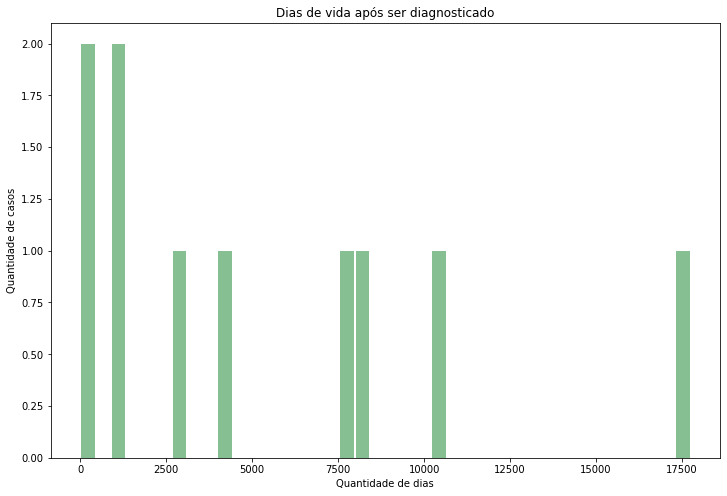

In [ ]:
avc_table.hist(column='Remaining_Life', bins=40, grid=False, figsize=(12,8),
                       color='#86bf91', zorder=2, rwidth=0.9, sharex=True,
                       sharey=True)
pl.title("Dias de vida após ser diagnosticado")
pl.xlabel("Quantidade de dias")
pl.ylabel("Quantidade de casos")

Para a análise dos dados, não convém manter informações que não serão usadas pelo *machine learning*, assim sendo, dados irrelevantes ou já contidos em outras colunas serão removidos. De imediato, pode-se remover as colunas de *START, STOP, BIRTHDATE* e *DEATHDATE*.

In [ ]:
avc_table_p1 = avc_table
#avc_table_p1.drop('START', axis=1, inplace=True)
avc_table_p1.drop('STOP', axis=1, inplace=True)
avc_table_p1.drop('BIRTHDATE', axis=1, inplace=True)
avc_table_p1.drop('DEATHDATE', axis=1, inplace=True)

if VERBOSE:
  display(avc_table)

,START,PATIENT,ENCOUNTER,Age,Remaining_Life
0,2010-02-25,4878a4aa-8c04-5071-781b-e839c0c8f9aa,cb72472f-a7ef-1041-da5f-69f57358894a,61,NaN
1,1995-06-11,125cf259-b9ca-0186-ef22-44f18162b6ef,c54e65c4-b5de-782d-eafb-6b1c1a6752ac,41,NaN
2,1970-12-12,9e0b3677-5616-d3a8-0016-8b5a934223a0,43bffc11-946c-f210-b9cf-d94aea8bc8ca,59,17745.0
3,1984-08-12,88cebca7-0d5b-0e9b-9da7-e6b2a5f89bee,22ffe427-65e8-cfa6-b3ed-e7776f400d05,21,NaN
4,2021-07-11,0f90def6-0a51-d9b5-c3fa-a2ba43107c3a,63fe401e-49bf-410b-be48-eeb6572028d4,67,NaN
5,2017-06-23,d8ece2c4-96cf-1066-05fd-f533a6fcbdd3,38d082db-7fb1-1c8e-cb11-d8538a40ec99,56,NaN
6,1989-01-23,7de4bcc2-5d51-6a2b-679d-18222dab25db,95387bb4-68f4-be95-e055-c1c4892335fc,37,NaN
7,2011-08-18,18042c20-7517-75a8-97bc-b50c2997a77c,8fec3cbe-0fb3-f104-6859-b33317061bc7,66,NaN
8,2017-09-08,73e53f58-b7f8-2290-03dd-abe53de814a1,84a465e0-d00c-4d21-8e35-07b808824ae3,65,938.0
9,2021-08-15,93ed96a2-c5f8-33e9-bb0b-1045f8a97469,3e7da301-a4d2-1301-f96f-126b121236df,54,NaN


Inicialmente pode ser interessante que o valor seja binário, portanto serão definidos intervalos para saber se o paciente morreu em um certo período específico. Os intervalos serão de:

*   0 dias
*   1 mês
*   6 meses
*   1 ano
*   2 anos

Foram tentados outros intervalos porém a quantidade de casos nestes intervalos não foi relevante, o que pode prejudicar a criação do modelo.


In [ ]:
day = 1
week = 7
month = 30
year = 365

avc_table_p2 = avc_table_p1
avc_table_p2['0-Day'] = avc_table_p2.Remaining_Life.map( lambda x: 1 if x == 0 else 0)
# avc_table_p2['1-Day'] = avc_table_p2.Remaining_Life.map( lambda x: 1 if x == 1 else 0)
# avc_table_p2['1-Week'] = avc_table_p2.Remaining_Life.map( lambda x: 1 if 1 < x <= week else 0)
# avc_table_p2['2-Week'] = avc_table_p2.Remaining_Life.map( lambda x: 1 if week < x <= 2*week else 0)
# avc_table_p2['1-Month'] = avc_table_p2.Remaining_Life.map( lambda x: 1 if 2*week < x <= month else 0)
avc_table_p2['1-Month'] = avc_table_p2.Remaining_Life.map( lambda x: 1 if 0 < x <= month else 0)
# avc_table_p2['3-Month'] = avc_table_p2.Remaining_Life.map( lambda x: 1 if month < x <= 3*month else 0)
# avc_table_p2['6-Month'] = avc_table_p2.Remaining_Life.map( lambda x: 1 if 3*month < x <= 6*month else 0)
avc_table_p2['6-Month'] = avc_table_p2.Remaining_Life.map( lambda x: 1 if month < x <= 6*month else 0)
avc_table_p2['1-year'] = avc_table_p2.Remaining_Life.map( lambda x: 1 if 6*month < x <= year else 0)
avc_table_p2['2-year'] = avc_table_p2.Remaining_Life.map( lambda x: 1 if year < x <= 2*year else 0)

if VERBOSE:
  display(avc_table_p2)

,START,PATIENT,ENCOUNTER,Age,Remaining_Life,0-Day,1-Month,6-Month,1-year,2-year
0,2010-02-25,4878a4aa-8c04-5071-781b-e839c0c8f9aa,cb72472f-a7ef-1041-da5f-69f57358894a,61,NaN,0,0,0,0,0
1,1995-06-11,125cf259-b9ca-0186-ef22-44f18162b6ef,c54e65c4-b5de-782d-eafb-6b1c1a6752ac,41,NaN,0,0,0,0,0
2,1970-12-12,9e0b3677-5616-d3a8-0016-8b5a934223a0,43bffc11-946c-f210-b9cf-d94aea8bc8ca,59,17745.0,0,0,0,0,0
3,1984-08-12,88cebca7-0d5b-0e9b-9da7-e6b2a5f89bee,22ffe427-65e8-cfa6-b3ed-e7776f400d05,21,NaN,0,0,0,0,0
4,2021-07-11,0f90def6-0a51-d9b5-c3fa-a2ba43107c3a,63fe401e-49bf-410b-be48-eeb6572028d4,67,NaN,0,0,0,0,0
5,2017-06-23,d8ece2c4-96cf-1066-05fd-f533a6fcbdd3,38d082db-7fb1-1c8e-cb11-d8538a40ec99,56,NaN,0,0,0,0,0
6,1989-01-23,7de4bcc2-5d51-6a2b-679d-18222dab25db,95387bb4-68f4-be95-e055-c1c4892335fc,37,NaN,0,0,0,0,0
7,2011-08-18,18042c20-7517-75a8-97bc-b50c2997a77c,8fec3cbe-0fb3-f104-6859-b33317061bc7,66,NaN,0,0,0,0,0
8,2017-09-08,73e53f58-b7f8-2290-03dd-abe53de814a1,84a465e0-d00c-4d21-8e35-07b808824ae3,65,938.0,0,0,0,0,0
9,2021-08-15,93ed96a2-c5f8-33e9-bb0b-1045f8a97469,3e7da301-a4d2-1301-f96f-126b121236df,54,NaN,0,0,0,0,0


### Adicionando dados do paciente

Alguns parâmetros importantes do paciente são interessantes para serem considerados, sendo estes *GENDER* e *RACE*. Estes serão adicionados na tabela através das informações contidas em *patient*.

In [ ]:
avc_table_p3 = avc_table_p2
avc_table_p3["GENDER"] = avc_table_p3['PATIENT'].map(patient.set_index('Id')['GENDER']) # 0 for woman and 1 for men
avc_table_p3["GENDER"] = avc_table_p3.GENDER.map( lambda x: 0 if x == "F" else 1)
avc_table_p3["RACE"] = avc_table_p3['PATIENT'].map(patient.set_index('Id')['RACE']) # 0 for white, 1 for black, 2 for asian
avc_table_p3["RACE"] = avc_table_p3.RACE.map( lambda x: 0 if x == "white" else (1 if x == "black" else 2))
#avc_table_p3["BIRTHPLACE"] = avc_table_p3['PATIENT'].map(patient.set_index('Id')['BIRTHPLACE'])

if VERBOSE:
  display(avc_table_p3)

,START,PATIENT,ENCOUNTER,Age,Remaining_Life,0-Day,1-Month,6-Month,1-year,2-year,GENDER,RACE
0,2010-02-25,4878a4aa-8c04-5071-781b-e839c0c8f9aa,cb72472f-a7ef-1041-da5f-69f57358894a,61,NaN,0,0,0,0,0,0,0
1,1995-06-11,125cf259-b9ca-0186-ef22-44f18162b6ef,c54e65c4-b5de-782d-eafb-6b1c1a6752ac,41,NaN,0,0,0,0,0,1,0
2,1970-12-12,9e0b3677-5616-d3a8-0016-8b5a934223a0,43bffc11-946c-f210-b9cf-d94aea8bc8ca,59,17745.0,0,0,0,0,0,0,2
3,1984-08-12,88cebca7-0d5b-0e9b-9da7-e6b2a5f89bee,22ffe427-65e8-cfa6-b3ed-e7776f400d05,21,NaN,0,0,0,0,0,1,0
4,2021-07-11,0f90def6-0a51-d9b5-c3fa-a2ba43107c3a,63fe401e-49bf-410b-be48-eeb6572028d4,67,NaN,0,0,0,0,0,0,0
5,2017-06-23,d8ece2c4-96cf-1066-05fd-f533a6fcbdd3,38d082db-7fb1-1c8e-cb11-d8538a40ec99,56,NaN,0,0,0,0,0,1,2
6,1989-01-23,7de4bcc2-5d51-6a2b-679d-18222dab25db,95387bb4-68f4-be95-e055-c1c4892335fc,37,NaN,0,0,0,0,0,0,0
7,2011-08-18,18042c20-7517-75a8-97bc-b50c2997a77c,8fec3cbe-0fb3-f104-6859-b33317061bc7,66,NaN,0,0,0,0,0,1,0
8,2017-09-08,73e53f58-b7f8-2290-03dd-abe53de814a1,84a465e0-d00c-4d21-8e35-07b808824ae3,65,938.0,0,0,0,0,0,1,0
9,2021-08-15,93ed96a2-c5f8-33e9-bb0b-1045f8a97469,3e7da301-a4d2-1301-f96f-126b121236df,54,NaN,0,0,0,0,0,0,0


### Analisando quantidade de encontros para cada paciente

Um parâmetro que pode ser adicionado é a quantidade de vezes que cada paciente teve encontros, para verificar se a quantidade de vezes que houve encontros no passado está relacionada a probabilidade de morte.

In [ ]:
avc_table_p4 = avc_table_p3
avc_table_p4["QUANTITY_ENCOUNTERS"] = avc_table_p4['PATIENT'].map( lambda x: (encounter["PATIENT"]==x).sum())

if VERBOSE:
  display(avc_table_p4)

,START,PATIENT,ENCOUNTER,Age,Remaining_Life,0-Day,1-Month,6-Month,1-year,2-year,GENDER,RACE,QUANTITY_ENCOUNTERS
0,2010-02-25,4878a4aa-8c04-5071-781b-e839c0c8f9aa,cb72472f-a7ef-1041-da5f-69f57358894a,61,NaN,0,0,0,0,0,0,0,88
1,1995-06-11,125cf259-b9ca-0186-ef22-44f18162b6ef,c54e65c4-b5de-782d-eafb-6b1c1a6752ac,41,NaN,0,0,0,0,0,1,0,64
2,1970-12-12,9e0b3677-5616-d3a8-0016-8b5a934223a0,43bffc11-946c-f210-b9cf-d94aea8bc8ca,59,17745.0,0,0,0,0,0,0,2,167
3,1984-08-12,88cebca7-0d5b-0e9b-9da7-e6b2a5f89bee,22ffe427-65e8-cfa6-b3ed-e7776f400d05,21,NaN,0,0,0,0,0,1,0,64
4,2021-07-11,0f90def6-0a51-d9b5-c3fa-a2ba43107c3a,63fe401e-49bf-410b-be48-eeb6572028d4,67,NaN,0,0,0,0,0,0,0,38
5,2017-06-23,d8ece2c4-96cf-1066-05fd-f533a6fcbdd3,38d082db-7fb1-1c8e-cb11-d8538a40ec99,56,NaN,0,0,0,0,0,1,2,36
6,1989-01-23,7de4bcc2-5d51-6a2b-679d-18222dab25db,95387bb4-68f4-be95-e055-c1c4892335fc,37,NaN,0,0,0,0,0,0,0,46
7,2011-08-18,18042c20-7517-75a8-97bc-b50c2997a77c,8fec3cbe-0fb3-f104-6859-b33317061bc7,66,NaN,0,0,0,0,0,1,0,113
8,2017-09-08,73e53f58-b7f8-2290-03dd-abe53de814a1,84a465e0-d00c-4d21-8e35-07b808824ae3,65,938.0,0,0,0,0,0,1,0,41
9,2021-08-15,93ed96a2-c5f8-33e9-bb0b-1045f8a97469,3e7da301-a4d2-1301-f96f-126b121236df,54,NaN,0,0,0,0,0,0,0,50


### Analisando pacientes com alergia à medicamento

Do ponto de vista de alergia, é interessante saber se o paciente tinha alguma alergia a algum medicamento que poderia vir a desencadear alguma reação.

In [ ]:
avc_table_p5 = avc_table_p4

# Primeiro, vamos pegar apenas pacientes que tem alergia a algum medicamento.
allergies_temp = allergies.loc[allergies['CATEGORY'] == 'medication']

# Agora verificamos se eles estão na nossa tabela de AVC, e em caso positivo, damos 1 para eles. Em caso negativo, 0.
avc_table_p5["ALLERGY_MED"] = avc_table_p5.PATIENT.map( lambda x: 1 if x in list(allergies_temp["PATIENT"]) else 0)

display(avc_table_p5)

,START,PATIENT,ENCOUNTER,Age,Remaining_Life,0-Day,1-Month,6-Month,1-year,2-year,GENDER,RACE,QUANTITY_ENCOUNTERS,ALLERGY_MED
0,2010-02-25,4878a4aa-8c04-5071-781b-e839c0c8f9aa,cb72472f-a7ef-1041-da5f-69f57358894a,61,NaN,0,0,0,0,0,0,0,88,0
1,1995-06-11,125cf259-b9ca-0186-ef22-44f18162b6ef,c54e65c4-b5de-782d-eafb-6b1c1a6752ac,41,NaN,0,0,0,0,0,1,0,64,0
2,1970-12-12,9e0b3677-5616-d3a8-0016-8b5a934223a0,43bffc11-946c-f210-b9cf-d94aea8bc8ca,59,17745.0,0,0,0,0,0,0,2,167,0
3,1984-08-12,88cebca7-0d5b-0e9b-9da7-e6b2a5f89bee,22ffe427-65e8-cfa6-b3ed-e7776f400d05,21,NaN,0,0,0,0,0,1,0,64,0
4,2021-07-11,0f90def6-0a51-d9b5-c3fa-a2ba43107c3a,63fe401e-49bf-410b-be48-eeb6572028d4,67,NaN,0,0,0,0,0,0,0,38,0
5,2017-06-23,d8ece2c4-96cf-1066-05fd-f533a6fcbdd3,38d082db-7fb1-1c8e-cb11-d8538a40ec99,56,NaN,0,0,0,0,0,1,2,36,0
6,1989-01-23,7de4bcc2-5d51-6a2b-679d-18222dab25db,95387bb4-68f4-be95-e055-c1c4892335fc,37,NaN,0,0,0,0,0,0,0,46,0
7,2011-08-18,18042c20-7517-75a8-97bc-b50c2997a77c,8fec3cbe-0fb3-f104-6859-b33317061bc7,66,NaN,0,0,0,0,0,1,0,113,0
8,2017-09-08,73e53f58-b7f8-2290-03dd-abe53de814a1,84a465e0-d00c-4d21-8e35-07b808824ae3,65,938.0,0,0,0,0,0,1,0,41,0
9,2021-08-15,93ed96a2-c5f8-33e9-bb0b-1045f8a97469,3e7da301-a4d2-1301-f96f-126b121236df,54,NaN,0,0,0,0,0,0,0,50,0


### Analisando histórico de doenças de impacto

Um item de relevância é saber se o paciente tem plano de saúde ou toma medicamento por ter histórico de alguma doença em particular que pode agravar o risco de AVC, que são:
1. Hipertensão
2. Pré-diabetes
3. Diabetes

Para esta análise, serão criadas 3 novas colunas, onde, se o paciente tem plano de saúde ou toma medicamento devido a uma dessas doenças, será identificado como 1, caso contrário, 0.

Um item adicional, a ser considerado, é se o paciente fez uso do fármaco Alteplase 100 MG Injection (CODE: 1804799), visto que, analisando os dados, ela foi usada em muitos casos, e está diretamente relacionada em tentar resolver às causas da AVC, o que aumenta a possibilidade de sobrevivência.


In [ ]:
avc_table_p6 = avc_table_p5

# Pacientes com plano de saude por causa de hipertensão
careplans_hyp = careplans.loc[careplans['REASONCODE'] == 59621000]
medications_hyp = medications.loc[medications['REASONCODE'] == 59621000]

# Agora verificamos se eles estão na nossa tabela de AVC, e em caso positivo, damos 1 para eles. Em caso negativo, 0.
avc_table_p6["HIST_HYPERT"] = avc_table_p6.PATIENT.map( lambda x: 1 if (x in list(careplans_hyp["PATIENT"]) or x in list(medications_hyp["PATIENT"])) else 0)

# Pacientes com plano de saude por causa de diabete
careplans_diab = careplans.loc[careplans['REASONCODE'] == 44054006]
medications_diab = medications.loc[medications['REASONCODE'] == 44054006]

# Agora verificamos se eles estão na nossa tabela de AVC, e em caso positivo, damos 1 para eles. Em caso negativo, 0.
avc_table_p6["HIST_DIAB"] = avc_table_p6.PATIENT.map( lambda x: 1 if (x in list(careplans_diab["PATIENT"]) or x in list(medications_diab["PATIENT"])) else 0)

# Pacientes com plano de saude por causa de prediabete
careplans_prediab = careplans.loc[careplans['REASONCODE'] == 15777000]
medications_prediab = medications.loc[medications['REASONCODE'] == 15777000]

# Agora verificamos se eles estão na nossa tabela de AVC, e em caso positivo, damos 1 para eles. Em caso negativo, 0.
avc_table_p6["HIST_PREDIAB"] = avc_table_p6.PATIENT.map( lambda x: 1 if (x in list(careplans_prediab["PATIENT"]) or x in list(medications_prediab["PATIENT"])) else 0)

# Um item observado é o uso do remedio Alteplase 100 MG Injection (CODE: 1804799), portanto também será criada uma coluna para quem fez uso desse medicamento:

medications_Alteplase = medications.loc[medications['CODE'] == 1804799]

avc_table_p6["MED_ALTEPLASE"] = avc_table_p6.PATIENT.map( lambda x: 1 if x in list(medications_Alteplase["PATIENT"]) else 0)

if VERBOSE:
  display(avc_table_p6)

,START,PATIENT,ENCOUNTER,Age,Remaining_Life,0-Day,1-Month,6-Month,1-year,2-year,GENDER,RACE,QUANTITY_ENCOUNTERS,ALLERGY_MED,HIST_HYPERT,HIST_DIAB,HIST_PREDIAB,MED_ALTEPLASE
0,2010-02-25,4878a4aa-8c04-5071-781b-e839c0c8f9aa,cb72472f-a7ef-1041-da5f-69f57358894a,61,NaN,0,0,0,0,0,0,0,88,0,0,0,0,0
1,1995-06-11,125cf259-b9ca-0186-ef22-44f18162b6ef,c54e65c4-b5de-782d-eafb-6b1c1a6752ac,41,NaN,0,0,0,0,0,1,0,64,0,1,0,0,0
2,1970-12-12,9e0b3677-5616-d3a8-0016-8b5a934223a0,43bffc11-946c-f210-b9cf-d94aea8bc8ca,59,17745.0,0,0,0,0,0,0,2,167,0,1,1,0,1
3,1984-08-12,88cebca7-0d5b-0e9b-9da7-e6b2a5f89bee,22ffe427-65e8-cfa6-b3ed-e7776f400d05,21,NaN,0,0,0,0,0,1,0,64,0,1,0,0,0
4,2021-07-11,0f90def6-0a51-d9b5-c3fa-a2ba43107c3a,63fe401e-49bf-410b-be48-eeb6572028d4,67,NaN,0,0,0,0,0,0,0,38,0,0,0,1,1
5,2017-06-23,d8ece2c4-96cf-1066-05fd-f533a6fcbdd3,38d082db-7fb1-1c8e-cb11-d8538a40ec99,56,NaN,0,0,0,0,0,1,2,36,0,0,0,1,1
6,1989-01-23,7de4bcc2-5d51-6a2b-679d-18222dab25db,95387bb4-68f4-be95-e055-c1c4892335fc,37,NaN,0,0,0,0,0,0,0,46,0,0,0,1,0
7,2011-08-18,18042c20-7517-75a8-97bc-b50c2997a77c,8fec3cbe-0fb3-f104-6859-b33317061bc7,66,NaN,0,0,0,0,0,1,0,113,0,1,0,1,0
8,2017-09-08,73e53f58-b7f8-2290-03dd-abe53de814a1,84a465e0-d00c-4d21-8e35-07b808824ae3,65,938.0,0,0,0,0,0,1,0,41,0,1,1,0,1
9,2021-08-15,93ed96a2-c5f8-33e9-bb0b-1045f8a97469,3e7da301-a4d2-1301-f96f-126b121236df,54,NaN,0,0,0,0,0,0,0,50,0,1,0,0,1


### Analisando dados provenientes do histórico de condições do paciente

Um outro item que pode estar relacionado é a obesidade, por isso serão adicionadas também duas outras colunas: uma para obesidade com IMC maior que 30 e outra para obesidade com IMC maior que 40.

Para o caso de obesidade, serão usados 3 valores possíveis:

*  0: Não tem obesidade
*  1: Obesidade 30
*  2: Obesidade 40

Outro dado de interesse é o estresse, para este parâmetro, será analisada a quantidade de casos registrados no histórico do paciente.

Igualmente, pacientes com hiperlipidemia são de interesse, pois apresentam valores elevados de colesterol. Para a análise deste dado, serão usados dois valores possíveis:

*  0: Não tem histórico de hiperlipidemia
*  1: Tem histórico de hiperlipidemia

Também, pacientes com hipertrigliceridemia também são de interesse, pois apresentam valores elevados de triglicerídeos. Para a análise deste dado, serão usados dois valores possíveis:

*  0: Não tem histórico de hipertrigliceridemia
*  1: Tem histórico de hipertrigliceridemia

Por fim, pacientes com hiperglicemia também são de interesse, pois apresentam valores elevados de açúcar no sangue. Em todo caso, este parâmetro não será adicionado pois foi verificado que os resultados são coincidentes com aqueles que tiveram diabetes.


In [ ]:
avc_table_p7 = avc_table_p6

# obesidade

# Obese +40

obese40 = conditions.loc[conditions['CODE'] == 408512008]

#avc_table_p7["OBESE40"] = avc_table_p7.PATIENT.map( lambda x: 1 if x in list(obese40["PATIENT"]) else 0)


# Obese +30

obese30 = conditions.loc[conditions['CODE'] == 162864005]

#avc_table_p7["OBESE30"] = avc_table_p6.PATIENT.map( lambda x: 1 if (x in list(obese30["PATIENT"]) and not x in list(obese40["PATIENT"])) else 0)

avc_table_p7["OBESE"] = avc_table_p7.PATIENT.map( lambda x: 2 if x in list(obese40["PATIENT"]) else ( 1 if x in list(obese30["PATIENT"]) else 0))


# estresse

stress = conditions.loc[conditions['CODE'] == 73595000]

avc_table_p7["QUANTITY_STRESS"] = avc_table_p7.PATIENT.map( lambda x: (stress["PATIENT"]==x).sum())

# hyperlipidemia

hyperlipidemia = conditions.loc[conditions['CODE'] == 55822004]

avc_table_p7["hyperlipidemia"] = avc_table_p7.PATIENT.map( lambda x: 1 if x in list(hyperlipidemia["PATIENT"]) else 0)

# hipertrigliceridemia

hipertrigliceridemia = conditions.loc[conditions['CODE'] == 302870006]

avc_table_p7["hipertrigliceridemia"] = avc_table_p7.PATIENT.map( lambda x: 1 if x in list(hipertrigliceridemia["PATIENT"]) else 0)

# hiperglicemia

# hiperglicemia = conditions.loc[conditions['CODE'] == 80394007]

# avc_table_p7["hiperglicemia"] = avc_table_p7.PATIENT.map( lambda x: 1 if x in list(hiperglicemia["PATIENT"]) else 0)


if VERBOSE:
  display(avc_table_p7)

,START,PATIENT,ENCOUNTER,Age,Remaining_Life,0-Day,1-Month,6-Month,1-year,2-year,...,QUANTITY_ENCOUNTERS,ALLERGY_MED,HIST_HYPERT,HIST_DIAB,HIST_PREDIAB,MED_ALTEPLASE,OBESE,QUANTITY_STRESS,hyperlipidemia,hipertrigliceridemia
0,2010-02-25,4878a4aa-8c04-5071-781b-e839c0c8f9aa,cb72472f-a7ef-1041-da5f-69f57358894a,61,NaN,0,0,0,0,0,...,88,0,0,0,0,0,1,4,1,0
1,1995-06-11,125cf259-b9ca-0186-ef22-44f18162b6ef,c54e65c4-b5de-782d-eafb-6b1c1a6752ac,41,NaN,0,0,0,0,0,...,64,0,1,0,0,0,1,12,0,0
2,1970-12-12,9e0b3677-5616-d3a8-0016-8b5a934223a0,43bffc11-946c-f210-b9cf-d94aea8bc8ca,59,17745.0,0,0,0,0,0,...,167,0,1,1,0,1,1,7,1,1
3,1984-08-12,88cebca7-0d5b-0e9b-9da7-e6b2a5f89bee,22ffe427-65e8-cfa6-b3ed-e7776f400d05,21,NaN,0,0,0,0,0,...,64,0,1,0,0,0,0,11,0,0
4,2021-07-11,0f90def6-0a51-d9b5-c3fa-a2ba43107c3a,63fe401e-49bf-410b-be48-eeb6572028d4,67,NaN,0,0,0,0,0,...,38,0,0,0,1,1,0,4,0,0
5,2017-06-23,d8ece2c4-96cf-1066-05fd-f533a6fcbdd3,38d082db-7fb1-1c8e-cb11-d8538a40ec99,56,NaN,0,0,0,0,0,...,36,0,0,0,1,1,2,3,0,0
6,1989-01-23,7de4bcc2-5d51-6a2b-679d-18222dab25db,95387bb4-68f4-be95-e055-c1c4892335fc,37,NaN,0,0,0,0,0,...,46,0,0,0,1,0,0,10,0,0
7,2011-08-18,18042c20-7517-75a8-97bc-b50c2997a77c,8fec3cbe-0fb3-f104-6859-b33317061bc7,66,NaN,0,0,0,0,0,...,113,0,1,0,1,0,0,17,1,0
8,2017-09-08,73e53f58-b7f8-2290-03dd-abe53de814a1,84a465e0-d00c-4d21-8e35-07b808824ae3,65,938.0,0,0,0,0,0,...,41,0,1,1,0,1,0,5,0,1
9,2021-08-15,93ed96a2-c5f8-33e9-bb0b-1045f8a97469,3e7da301-a4d2-1301-f96f-126b121236df,54,NaN,0,0,0,0,0,...,50,0,1,0,0,1,1,4,0,0


### Analisando histórico de tabagismo do paciente

Alguns dados laboratoriais são igualmente importantes para esta análise e convém que sejam observados, são eles:

*   Pressão diastólica (DIASTOLIC) >=140
*   Pressão sistólica (SYSTOLIC) >=90
*   Frequência cardíaca (HEARTRATE) >=100
*   Tabagismo (TABACCO) yes/no
*   Contagem plaquetária (PLATELETS) >=450
*   Sensibilidade a dor (PAINSEVERITY) 0 to 10
*   Valor de LDL 0 se x < 70, 1 se 70 <= x < 130 e 2 se x > 130 
*   Valor de trigicerídeos (Triglycerides) >= 200
*   Valor de HDL < 40

Infelizmente, poucos pacientes tem as medidas referentes ao encontro, e fazendo as análises com base no histórico, não se pode concluir que os valores estavam fora do normal, pois variam com frequência. O único dado que foi possível de se aproveitar é se o paciente tem histórico de tabagismo.

Para análise se a pessoa já usou tabaco, será usada a definição:

*  0: Não fuma
*  1: Fuma


In [ ]:
avc_table_p8 = avc_table_p7

# DIASTOLIC >=140
# diastolic = observations.loc[observations['CODE'] == "8462-4"]

# avc_table_p8["DIASTOLIC"] = avc_table_p8.PATIENT.map( lambda x: 1 if x in list(diastolic["PATIENT"]) else 0)

# SYSTOLIC >=90
# systolic = observations.loc[observations['CODE'] == "8480-6"]

# avc_table_p8["SYSTOLIC"] = avc_table_p8.PATIENT.map( lambda x: 1 if x in list(systolic["PATIENT"]) else 0)

# HEARTRATE >=100
# heartrate = observations.loc[observations['CODE'] == "8867-4"]

# avc_table_p8["HEARTRATE"] = avc_table_p8.PATIENT.map( lambda x: 1 if x in list(heartrate["PATIENT"]) else 0)

# TABACCO yes/no
tabacco = observations.loc[observations['CODE'] == "72166-2"]
tabacco_list = []
for aux in list(avc_table_p2["PATIENT"]):
  temp_df = tabacco[tabacco['PATIENT'].str.contains(aux)]
  value = 0
  if not all( i == "Never smoker" for i in list(temp_df['VALUE']) ):
    value = 1
  tabacco_list.append(value)

avc_table_p8["TABACCO"] = tabacco_list

# avc_table_p8["TABACCO"] = avc_table_p8.PATIENT.map( lambda x: 1 if x in list(tabacco["PATIENT"]) else 0)

# PLATELETS >=450
# platelets = observations.loc[observations['CODE'] == "777-3"]

# avc_table_p8["PLATELETS"] = avc_table_p8.PATIENT.map( lambda x: 1 if x in list(platelets["PATIENT"]) else 0)

# PAINSEVERITY 0 to 10
# painseverity = observations.loc[observations['CODE'] == "72514-3"]

# avc_table_p8["PAINSEVERITY"] = avc_table_p8.PATIENT.map( lambda x: 1 if x in list(painseverity["PATIENT"]) else 0)

# LDL 0 if x < 70, 1 if 70 <= x < 130, 2 if x > 130
# ldl = observations.loc[observations['CODE'] == "18262-6"]

# avc_table_p8["LDL"] = avc_table_p8.PATIENT.map( lambda x: 1 if x in list(ldl["PATIENT"]) else 0)

# Triglycerides >= 200
# triglycerides = observations.loc[observations['CODE'] == "2571-8"]

# avc_table_p8["TRIGLYCERIDES"] = avc_table_p8.PATIENT.map( lambda x: 1 if x in list(triglycerides["PATIENT"]) else 0)

# HDL < 40
# hdl = observations.loc[observations['CODE'] == "2085-9"]

# avc_table_p8["HDL"] = avc_table_p8.PATIENT.map( lambda x: 1 if x in list(hdl["PATIENT"]) else 0)

# avc_table_p8['1-Month'] = diastolic.VALUE.map( lambda x: 1 if 0 < x <= month else 0)

if VERBOSE:
  display(avc_table_p8)

,START,PATIENT,ENCOUNTER,Age,Remaining_Life,0-Day,1-Month,6-Month,1-year,2-year,...,ALLERGY_MED,HIST_HYPERT,HIST_DIAB,HIST_PREDIAB,MED_ALTEPLASE,OBESE,QUANTITY_STRESS,hyperlipidemia,hipertrigliceridemia,TABACCO
0,2010-02-25,4878a4aa-8c04-5071-781b-e839c0c8f9aa,cb72472f-a7ef-1041-da5f-69f57358894a,61,NaN,0,0,0,0,0,...,0,0,0,0,0,1,4,1,0,0
1,1995-06-11,125cf259-b9ca-0186-ef22-44f18162b6ef,c54e65c4-b5de-782d-eafb-6b1c1a6752ac,41,NaN,0,0,0,0,0,...,0,1,0,0,0,1,12,0,0,0
2,1970-12-12,9e0b3677-5616-d3a8-0016-8b5a934223a0,43bffc11-946c-f210-b9cf-d94aea8bc8ca,59,17745.0,0,0,0,0,0,...,0,1,1,0,1,1,7,1,1,0
3,1984-08-12,88cebca7-0d5b-0e9b-9da7-e6b2a5f89bee,22ffe427-65e8-cfa6-b3ed-e7776f400d05,21,NaN,0,0,0,0,0,...,0,1,0,0,0,0,11,0,0,0
4,2021-07-11,0f90def6-0a51-d9b5-c3fa-a2ba43107c3a,63fe401e-49bf-410b-be48-eeb6572028d4,67,NaN,0,0,0,0,0,...,0,0,0,1,1,0,4,0,0,0
5,2017-06-23,d8ece2c4-96cf-1066-05fd-f533a6fcbdd3,38d082db-7fb1-1c8e-cb11-d8538a40ec99,56,NaN,0,0,0,0,0,...,0,0,0,1,1,2,3,0,0,1
6,1989-01-23,7de4bcc2-5d51-6a2b-679d-18222dab25db,95387bb4-68f4-be95-e055-c1c4892335fc,37,NaN,0,0,0,0,0,...,0,0,0,1,0,0,10,0,0,1
7,2011-08-18,18042c20-7517-75a8-97bc-b50c2997a77c,8fec3cbe-0fb3-f104-6859-b33317061bc7,66,NaN,0,0,0,0,0,...,0,1,0,1,0,0,17,1,0,0
8,2017-09-08,73e53f58-b7f8-2290-03dd-abe53de814a1,84a465e0-d00c-4d21-8e35-07b808824ae3,65,938.0,0,0,0,0,0,...,0,1,1,0,1,0,5,0,1,0
9,2021-08-15,93ed96a2-c5f8-33e9-bb0b-1045f8a97469,3e7da301-a4d2-1301-f96f-126b121236df,54,NaN,0,0,0,0,0,...,0,1,0,0,1,1,4,0,0,0


### Removendo colunas não necessárias para a análise

Algumas colunas não são necessárias para as análises, e portanto podem ser ignoradas.

In [ ]:
avc_table_p9 = avc_table_p8

avc_table_p9.drop('START', axis=1, inplace=True)
avc_table_p9.drop('PATIENT', axis=1, inplace=True)
avc_table_p9.drop('ENCOUNTER', axis=1, inplace=True)
# avc_table_p9.drop('Remaining_Life', axis=1, inplace=True)
# avc_table_p9.drop('BIRTHPLACE', axis=1, inplace=True)

if VERBOSE:
  display(avc_table_p9)

,Age,Remaining_Life,0-Day,1-Month,6-Month,1-year,2-year,GENDER,RACE,QUANTITY_ENCOUNTERS,ALLERGY_MED,HIST_HYPERT,HIST_DIAB,HIST_PREDIAB,MED_ALTEPLASE,OBESE,QUANTITY_STRESS,hyperlipidemia,hipertrigliceridemia,TABACCO
0,61,NaN,0,0,0,0,0,0,0,88,0,0,0,0,0,1,4,1,0,0
1,41,NaN,0,0,0,0,0,1,0,64,0,1,0,0,0,1,12,0,0,0
2,59,17745.0,0,0,0,0,0,0,2,167,0,1,1,0,1,1,7,1,1,0
3,21,NaN,0,0,0,0,0,1,0,64,0,1,0,0,0,0,11,0,0,0
4,67,NaN,0,0,0,0,0,0,0,38,0,0,0,1,1,0,4,0,0,0
5,56,NaN,0,0,0,0,0,1,2,36,0,0,0,1,1,2,3,0,0,1
6,37,NaN,0,0,0,0,0,0,0,46,0,0,0,1,0,0,10,0,0,1
7,66,NaN,0,0,0,0,0,1,0,113,0,1,0,1,0,0,17,1,0,0
8,65,938.0,0,0,0,0,0,1,0,41,0,1,1,0,1,0,5,0,1,0
9,54,NaN,0,0,0,0,0,0,0,50,0,1,0,0,1,1,4,0,0,0


### Classificação de tempo de vida

Com o objetivo de ajudar na análise, o tempo de vida também será classificado, conforme tabela 2 seguinte. 

Classe | Tempo de vida
-------|--------------
0      | 0 dias
1      | 1 mês
2      | 6 meses
3      | 1 ano
4      | 2 anos
5      | não morreu 

<center><b>Tabela 2: Classificação de tempo de vida</b></center>

Uma vez que o dado é classificado, o tempo residual de vida pode ser removido.

In [ ]:
def remainging_time(element):
  if element < 1:
    return 0
  elif element <= 30:
    return 1
  elif element <= 180:
    return 2
  elif element <= 365:
    return 3
  elif element < 99999999:
    return 4
  else:
    return 5

In [ ]:
avc_table_p10 = avc_table_p9

avc_table_p10['REMAIN_LIFE'] = avc_table_p2.Remaining_Life.map(remainging_time)

avc_table_p10.drop('Remaining_Life', axis=1, inplace=True)

if VERBOSE:
  display(avc_table_p10)

,Age,0-Day,1-Month,6-Month,1-year,2-year,GENDER,RACE,QUANTITY_ENCOUNTERS,ALLERGY_MED,HIST_HYPERT,HIST_DIAB,HIST_PREDIAB,MED_ALTEPLASE,OBESE,QUANTITY_STRESS,hyperlipidemia,hipertrigliceridemia,TABACCO,REMAIN_LIFE
0,61,0,0,0,0,0,0,0,88,0,0,0,0,0,1,4,1,0,0,5
1,41,0,0,0,0,0,1,0,64,0,1,0,0,0,1,12,0,0,0,5
2,59,0,0,0,0,0,0,2,167,0,1,1,0,1,1,7,1,1,0,4
3,21,0,0,0,0,0,1,0,64,0,1,0,0,0,0,11,0,0,0,5
4,67,0,0,0,0,0,0,0,38,0,0,0,1,1,0,4,0,0,0,5
5,56,0,0,0,0,0,1,2,36,0,0,0,1,1,2,3,0,0,1,5
6,37,0,0,0,0,0,0,0,46,0,0,0,1,0,0,10,0,0,1,5
7,66,0,0,0,0,0,1,0,113,0,1,0,1,0,0,17,1,0,0,5
8,65,0,0,0,0,0,1,0,41,0,1,1,0,1,0,5,0,1,0,4
9,54,0,0,0,0,0,0,0,50,0,1,0,0,1,1,4,0,0,0,5


Com relação aos dados (Tabela 3):

Coluna | Classificação
-------|--------------
Age      | Idade do paciente
0-Day      | Pacientes que morreram no dia
1-Month      | Pacientes que morreram com 1 mês
6-Month      | Pacientes que morreram em 6 meses
1-year      | Pacientes que morreram em 1 ano
2-year      | Pacientes que morreram em 2 anos
GENDER | Sexo dos pacientes
RACE | Raça dos pacientes
QUANTITY_ENCOUNTERS | Quantidade de encontros para cada paciente
ALLERGY_MED | Se o paciente tem alergia à algum medicamento
HIST_HYPERT | Se o paciente tem histórico de hipertensão
HIST_DIAB | Se o paciente tem histórico de diabete
HIST_PREDIAB | Se o paciente tem histórico de pré-diabete
MED_ALTEPLASE | Se o paciente fez uso do remédio Alteplase
OBESE | Se o paciente é obeso, sendo: 0 - não obeso, 1 - obeso30, 2 - obeso40
QUANTITY_STRESS | Quantidade de diagnosticos indicando estresse
hyperlipidemia | Se o paciente tem histórico de hiperlipidemia
hipertrigliceridemia | Se o paciente tem histórico de hipertrigliceridemia
TABACCO | Se o paciente já fumou na vida
REMAIN_LIFE | Classificação do tempo de vida após o diagnóstico de AVC

<center><b>Tabela 3: Dados utilizados</b></center>

Para o *REMAIN_LIFE*, conforme indicado antes pela tabela 2:

Classe | Tempo de vida
-------|--------------
0      | 0 dias
1      | 1 mês
2      | 6 meses
3      | 1 ano
4      | 2 anos
5      | não morreu

<center><b>Tabela 1: participantes</b></center>

Salvando o resultado no drive

In [ ]:
avc_table_p10.to_csv(files_path + filename + ".csv")

# Resultados Obtidos

Itens que, com base em testes usando o Orange, serão ignorados na análise:

*features 1, 0-Day, 1-Month,	6-Month,	1-year,	2-year*.

Em que *features* são os índices, no caso das colunas referentes aos óbitos classificados em dados binários, observou-se que para a análise usando o REMAIN_LIFE os resultados foram melhores.

Três modelos foram usados:

*   SVM
*   *Random Forest*
*   *Logistic Regression*

Para o SVM, o custo é 1.5, epsilon 0.1 e tolerância 0.001, e o número de iterações 200. O Kernel usado é o RBF. 

Para o *Random Fores*t, foram usadas 15 árvores. 

Para o *Logistic Refression*, a força c é igual à 1, e o tipo de regularização é o ridge.

Para as análises com K-means, K=6.

No caso dos hierárquicos, cada análise teve a sua configuração.

Os modelos foram selecionados a partir de análises, verificando os que apresentavam melhores resultados focando em clusterização.

Para a tabela, são análisados os parâmetros de:

*   AUC: *Area Under ROC Curve*
*   CA: *Classification Accuracy*
*   F1
*   *Precision*
*   *Recall*

Os resultados obtidos com base no Orange são:

## Treino e teste a partir dos cenários 1 e 2

Neste caso os cenários 1 e 2 foram unificados e usados para o treino e teste do modelo.

O esquema montado no Orange foi (imagem 1):

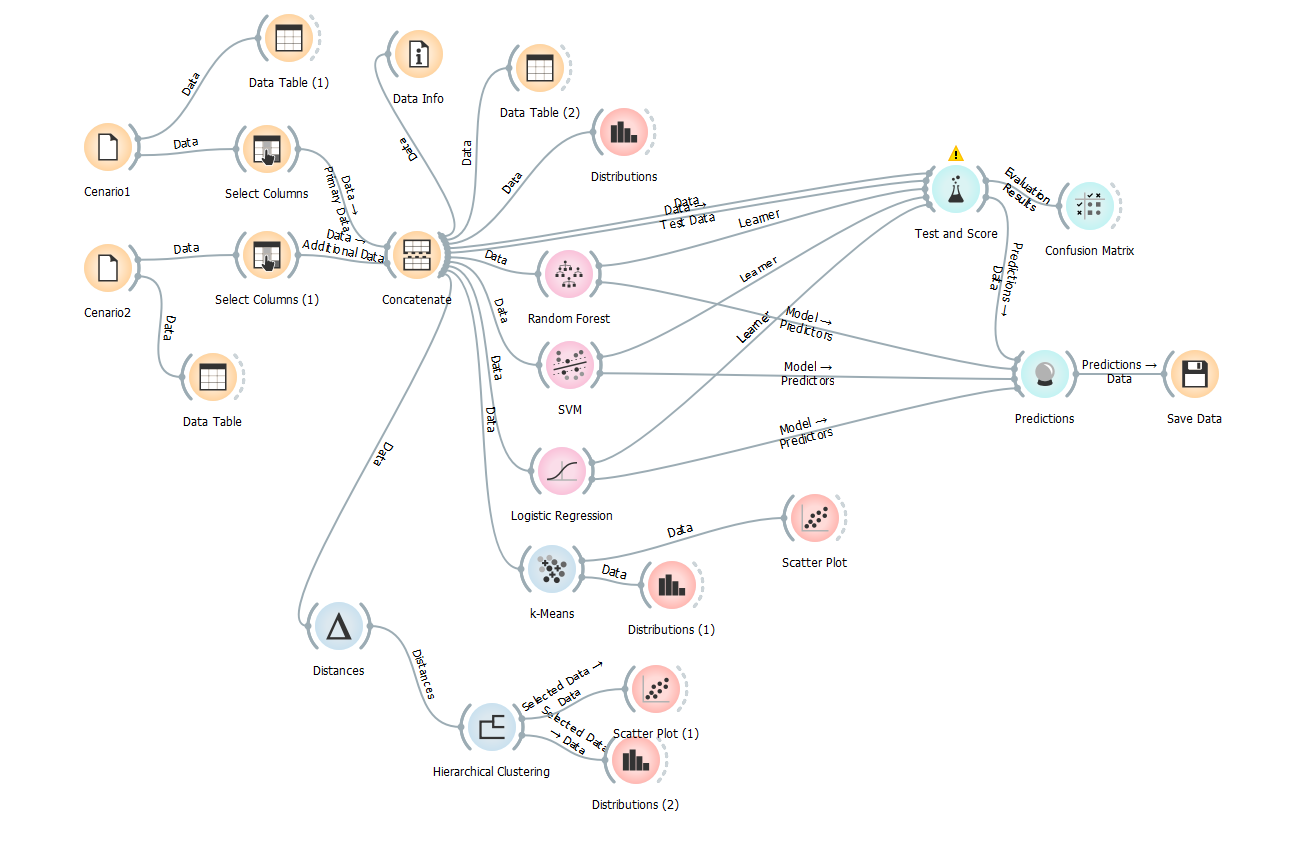

<center><b>Imagem 1: Orange (treino e teste cenários 1 e 2)</b></center>

### Tabela obtida

A tabela 4 obtida para os 3 modelos usados é:

Model                 | AUC    | CA       | F1     | Precision   | Recall
----------------------|--------|----------|--------|-------------|---------
SVM                   | 0.892  | 0.798    | 0.754  | 0.810       | 0.798
Random Forest         | 0.988  | 0.881    | 0.869  | 0.879       | 0.881
Logistic Regression   | 0.703  | 0.631    | 0.519  | 0.485       | 0.631  

<center><b>Tabela 4: Métricas treino e teste cenários 1 e 2</b></center>

#### Histogram Cluster Life - Hierárquico

A Imagem 2 abaixo mostra o histograma da divisão dos dados em clusters usando hierarquia.

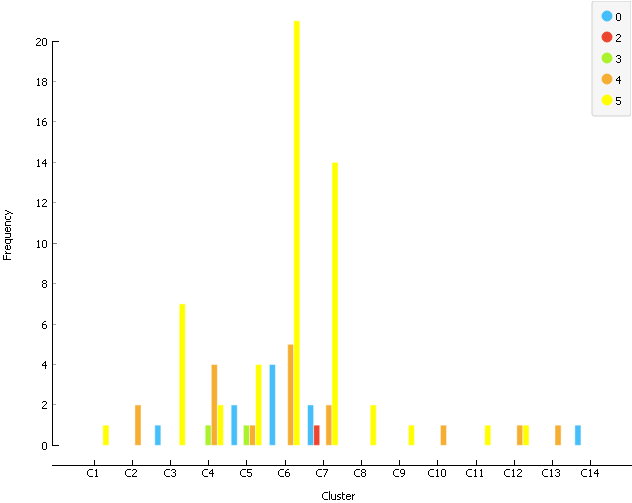

<b>Imagem 2: Histograma clusterização hierárquica treino e teste cenários 1 e 2</b>

#### Hierarquia

A Imagem 3 abaixo mostra a hierarquia, em que o eixo Y representa a identificação de cada dado. Pelo dendograma é possível ver como cada cluster foi construído.

Para este foi usada uma taxa de altura de 49.6%

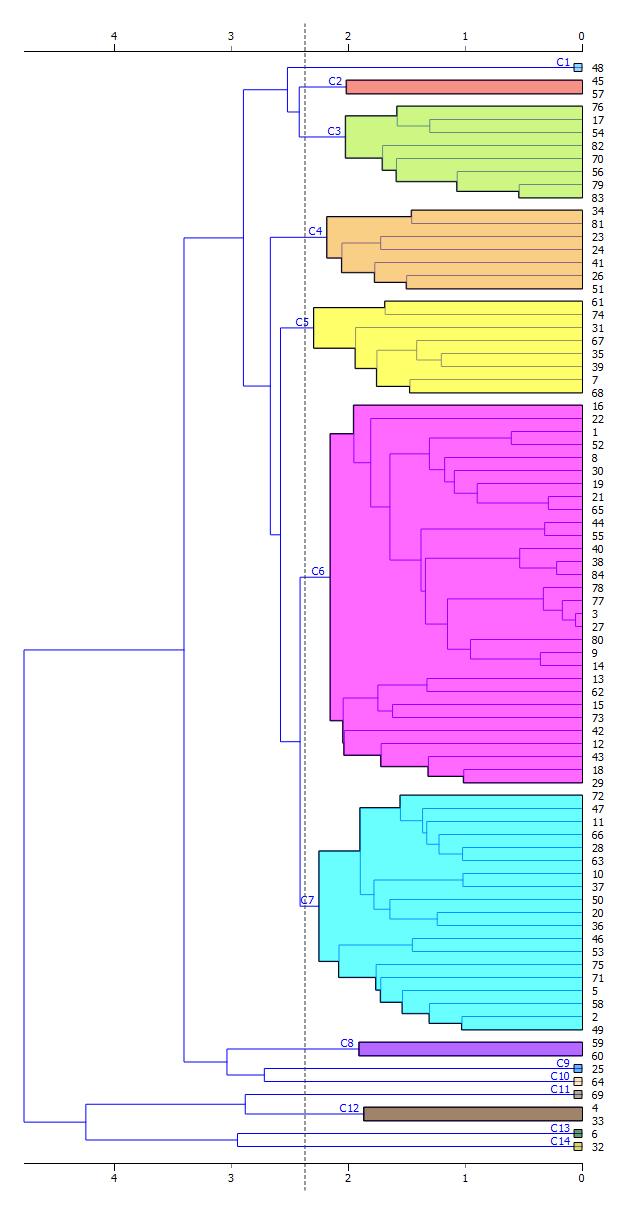

<b>Imagem 3: Dendograma treino e teste cenários 1 e 2</b>

#### Histogram Cluster Life - K-means

A Imagem 4 abaixo mostra o histograma da divisão dos dados em clusters usando Kmeans.

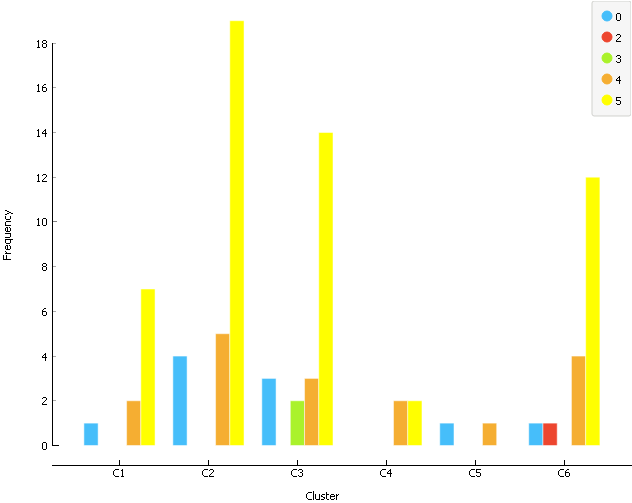

<b>Imagem 4: Histograma K-means treino e teste cenários 1 e 2</b>

## Treino e teste a partir dos cenários 1, 2 e 3

Neste caso os cenários 1, 2 e 3 foram unificados e usados para o treino e teste do modelo.

O esquema montado no Orange foi (imagem 5):

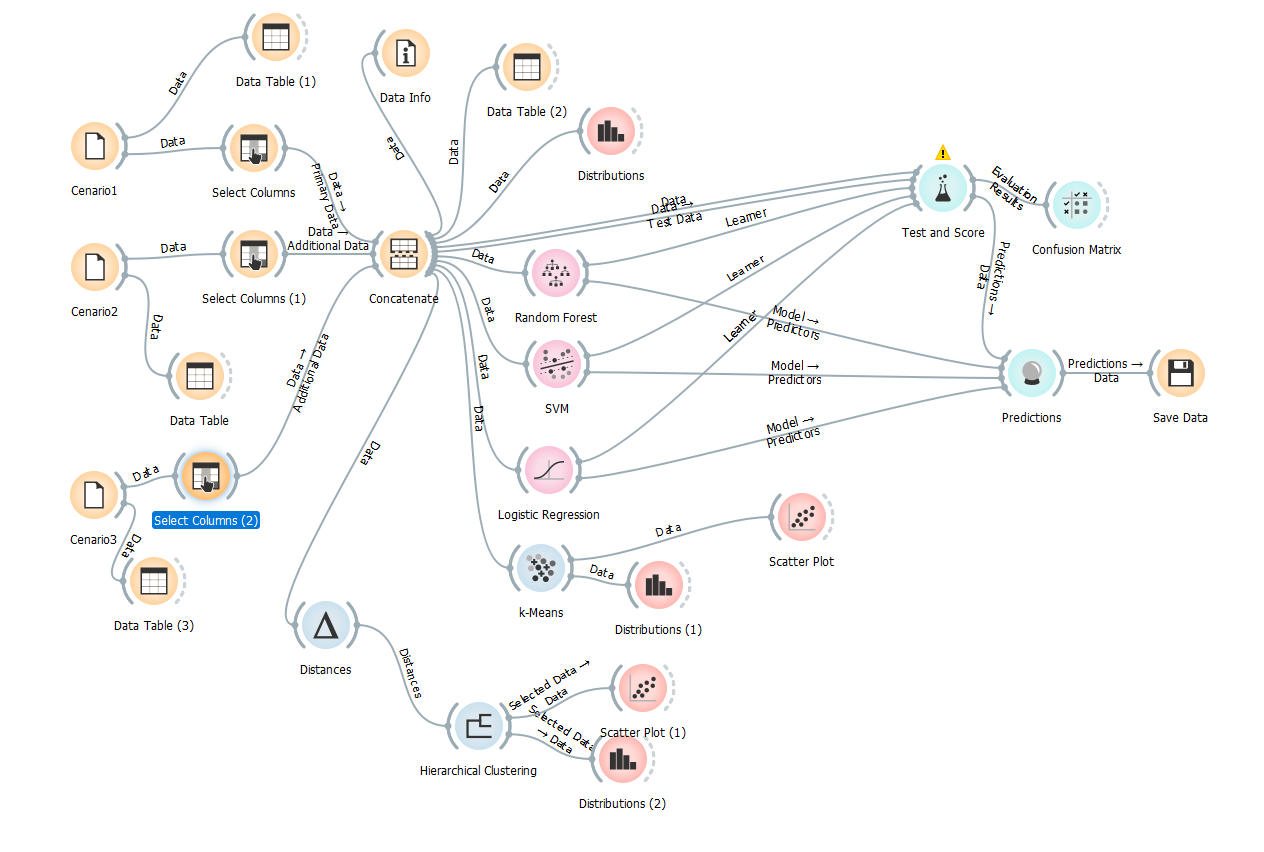

<center><b>Imagem 5: Orange (treino e teste cenários 1, 2 e 3)</b></center>

### Tabela obtida


A tabela 5 obtida para os 3 modelos usados é:

Model                 | AUC    | CA       | F1     | Precision   | Recall
----------------------|--------|----------|--------|-------------|---------
SVM                   | 0.820  | 0.689    | 0.595  | 0.771       | 0.689
Random Forest         | 0.988  | 0.883    | 0.874  | 0.895       | 0.883
Logistic Regression   | 0.623  | 0.634    | 0.521  | 0.491       | 0.634

<center><b>Tabela 5: Métricas treino e teste cenários 1, 2 e 3</b></center>

#### Histogram Cluster Life - Hierárquico

A imagem 6 abaixo mostra o histograma da divisão dos dados em clusters usando hierarquia.

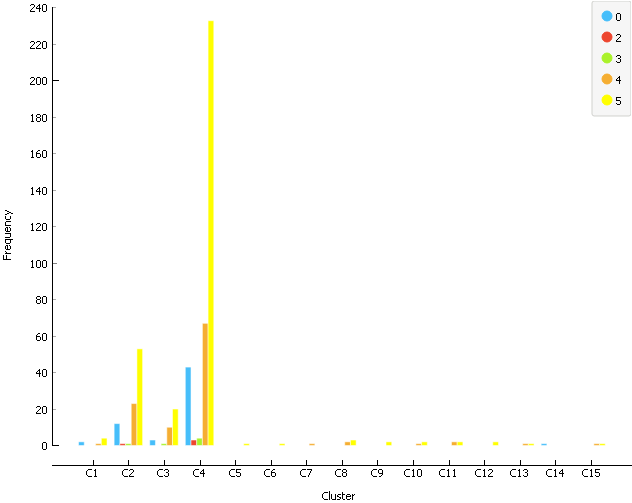

<b>Imagem 6: Histograma clusterização hierárquica treino e teste cenários 1 e 2</b>

#### Hierarquia

A Imagem 7 abaixo mostra a hierarquia, em que o eixo Y representa a identificação de cada dado. Pelo dendograma é possível ver como cada cluster foi construído.

Para este foi usada uma taxa de altura de 44.4%

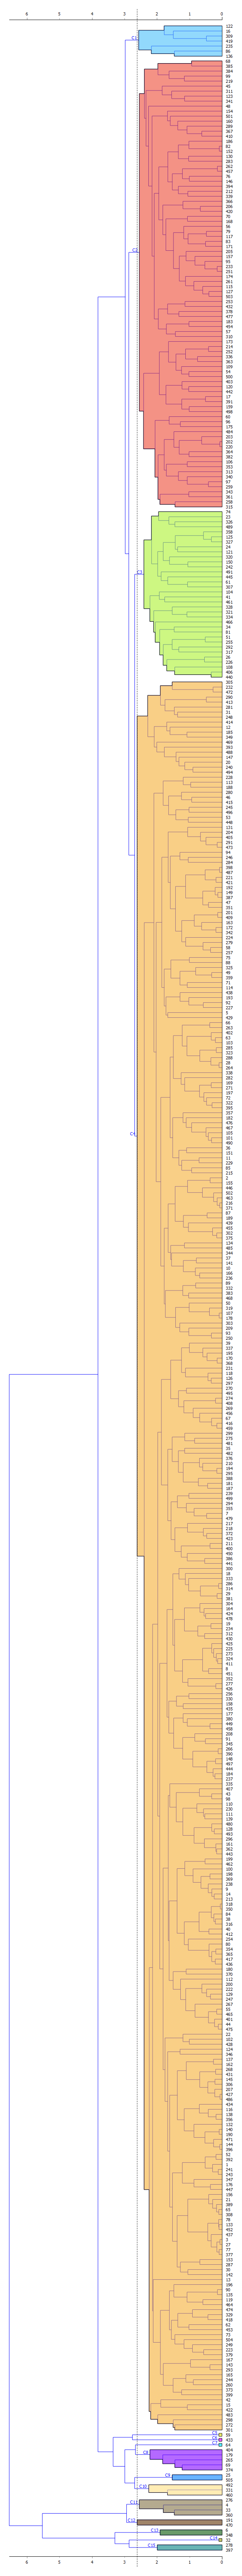

<b>Imagem 7: Dendograma treino e teste cenários 1, 2 e 3</b>

#### Histogram Cluster Life - K-means

A figura abaixo mostra o histograma da divisão dos dados em clusters usando Kmeans.

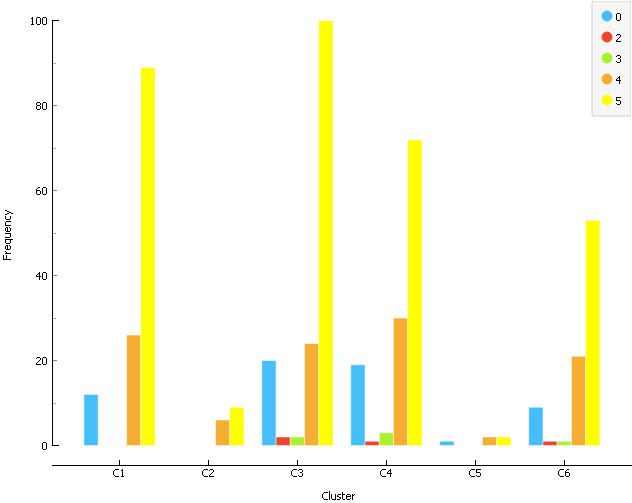

<b>Imagem 8: Histograma K-means treino e teste cenários 1, 2 e 3</b>

## Treino com dados do cenário 1 e testes do cenário 2

Neste caso o cenário 1 foi usado para treinar o modelo e o 2 para testar o modelo.

O esquema montado no Orange foi (imgaem 9):

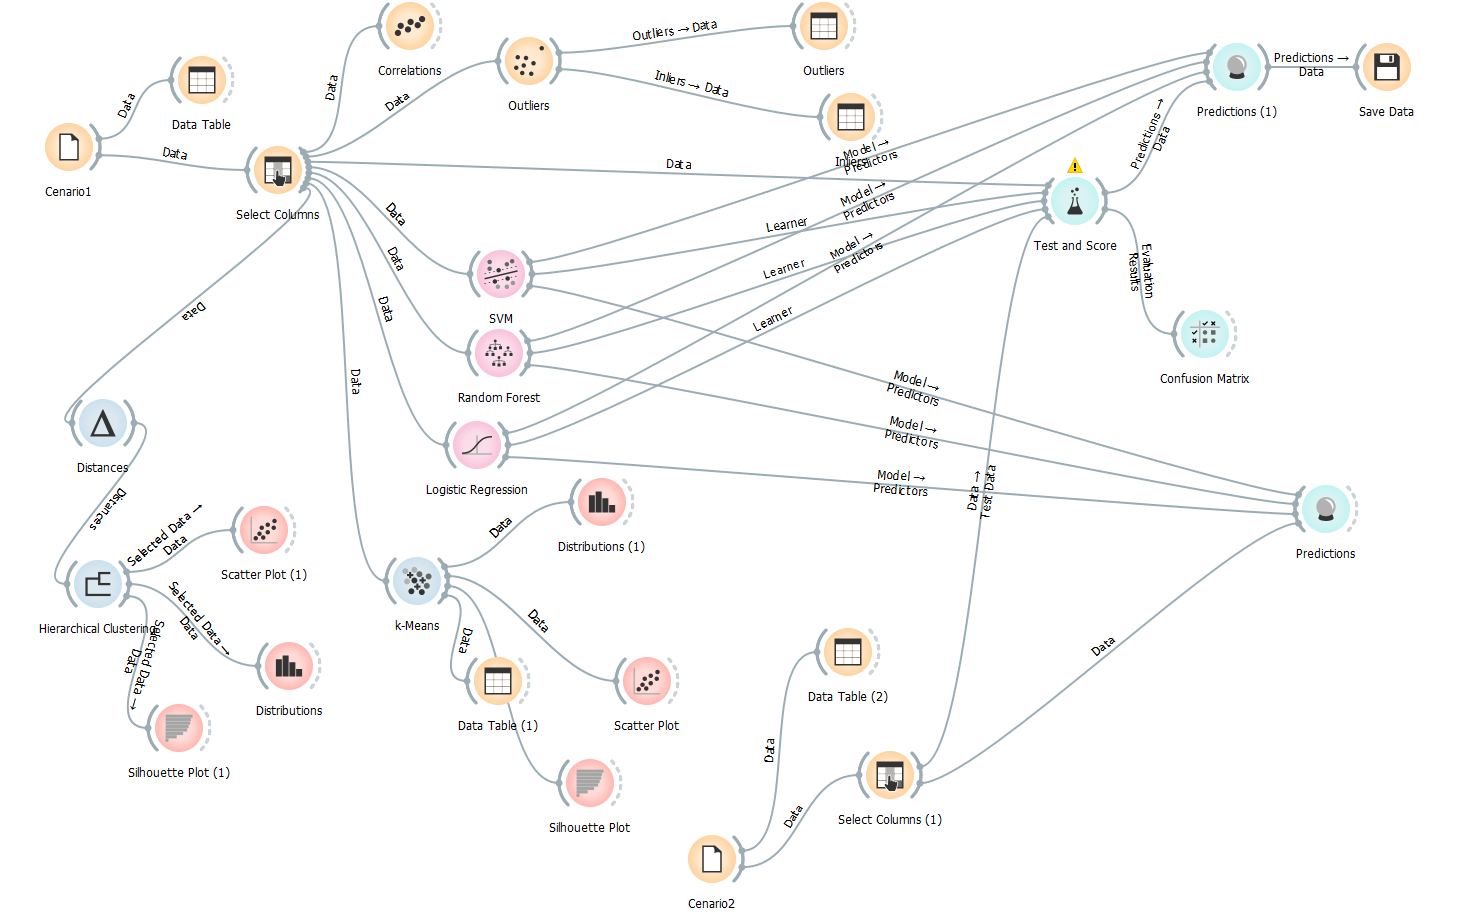

<center><b>Imagem 9: Orange (treino cenário 1 e teste cenários 2)</b></center>

### Tabela obtida

Model                 | AUC    | CA       | F1     | Precision   | Recall
----------------------|--------|----------|--------|-------------|---------
SVM                   | 0.831  | 0.762    | 0.720  | 0.742       | 0.762
Random Forest         | 0.791  | 0.571    | 0.498  | 0.576       | 0.571
Logistic Regression   | 0.982  | 0.833    | 0.819  | 0.818       | 0.833

<center><b>Tabela 6: Métricas treino cenário 1 e teste 2</b></center>

#### Histogram Cluster Life - Hierárquico

A imagem 10 abaixo mostra o histograma da divisão dos dados em clusters usando hierarquia.

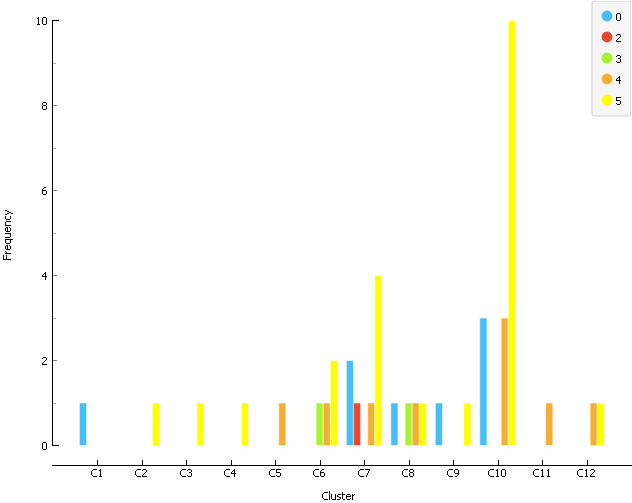

<b>Imagem 10: Histograma clusterização hierárquica treino cenário 1 e teste cenário 2</b>

#### Hierarquia

A imagem 11 abaixo mostra a hierarquia, em que o eixo Y representa a identificação de cada dado. Pelo dendograma é possível ver como cada cluster foi construído.

Para este foi usada uma taxa de altura de 39.2%

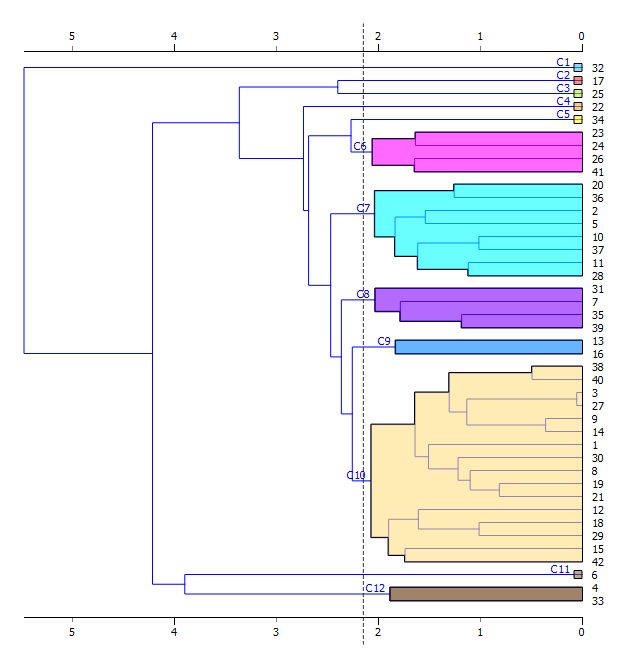

<b>Imagem 11: Dendograma treino cenário 1 e teste cenário 2</b>

#### Histogram Cluster Life - K-means

A Imagem 12 abaixo mostra o histograma da divisão dos dados em clusters usando Kmeans.

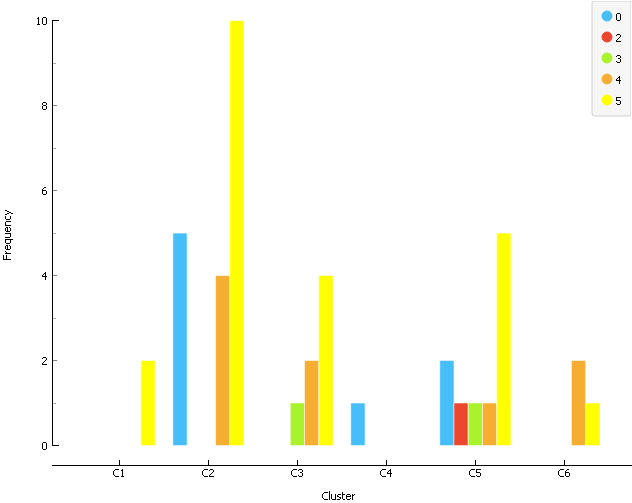

<b>Imagem 12: Histograma K-means treino cenário 1 e teste cenários 2</b>

## Treino com dados do cenário 2 e testes do cenário 1

Neste caso o cenário 2 foi usado para treinar o modelo e o 1 para testar o modelo.

O esquema montado no Orange foi (Imagem 13):

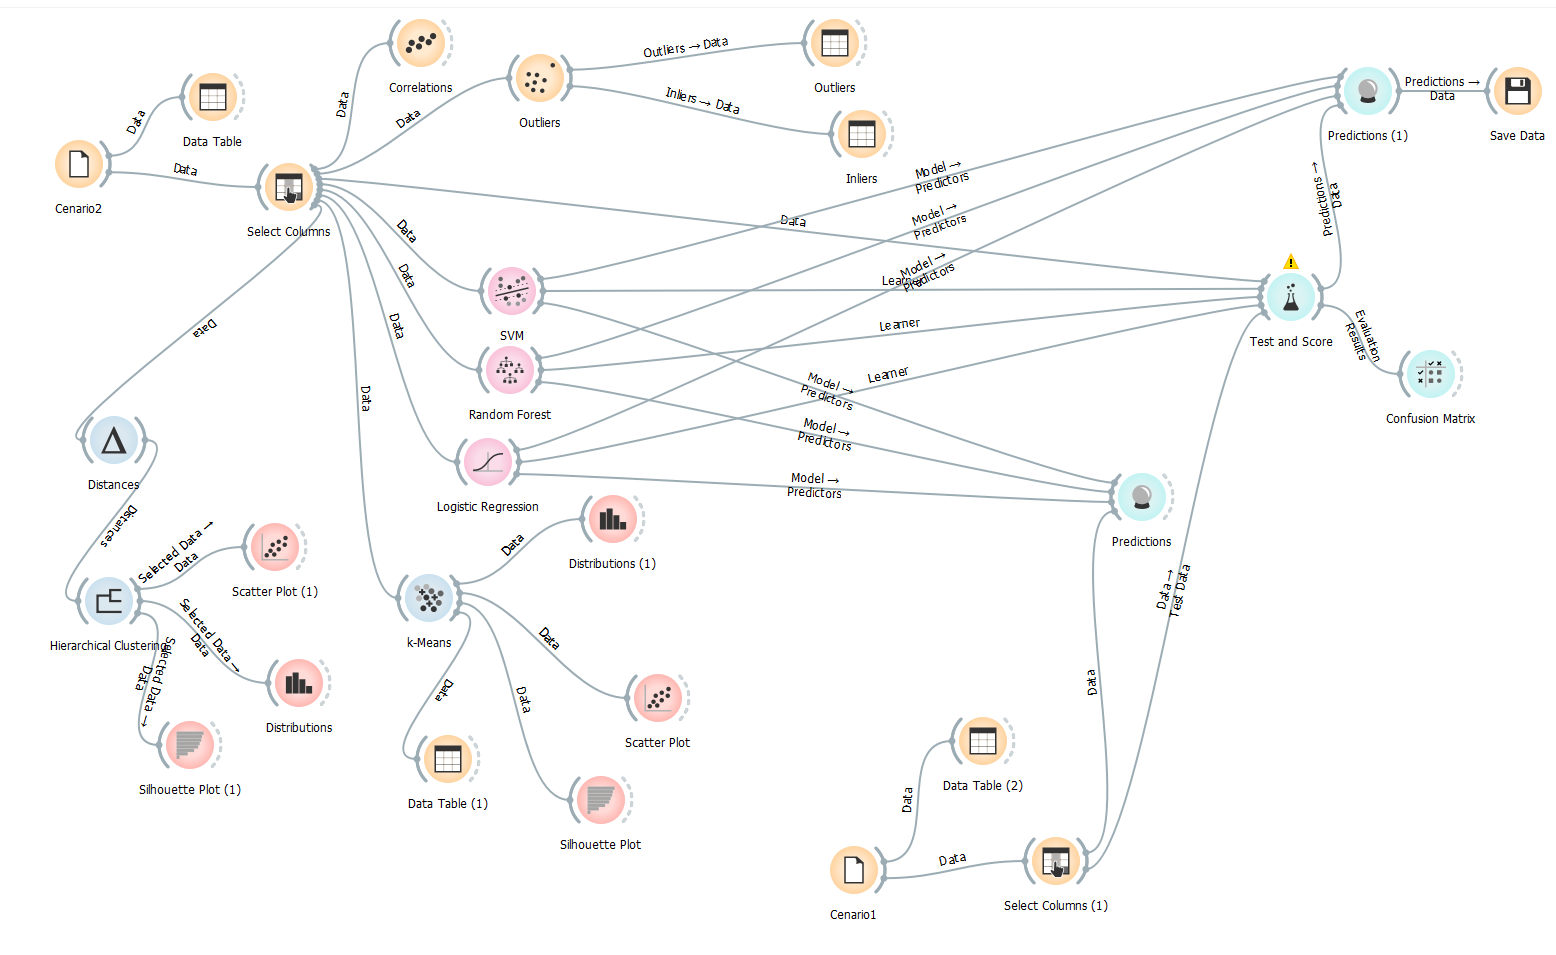

<center><b>Imagem 13: Orange (treino cenário 2 e teste cenário 1)</b></center>

### Tabela obtida

Model                 | AUC    | CA       | F1     | Precision   | Recall
----------------------|--------|----------|--------|-------------|---------
SVM                   | 0.804  | 0.952    | 0.948  | 0.955       | 0.952
Random Forest         | 0.987  | 0.929    | 0.906  | 0.887       | 0.929
Logistic Regression   | 0.932  | 0.905    | 0.880  | 0.868       | 0.905

<center><b>Tabela 7: Métricas treino cenário 2 e teste 1</b></center>

#### Histogram Cluster Life - Hierárquico

A Imagem 14 abaixo mostra o histograma da divisão dos dados em clusters usando hierarquia.

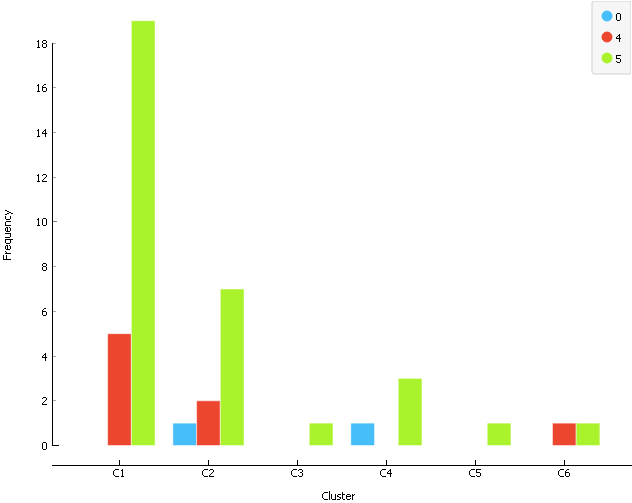

<b>Imagem 14: Histograma clusterização hierárquica treino cenário 2 e teste cenário 3</b>

#### Hierarquia

A Imagem 15 abaixo mostra a hierarquia, em que o eixo Y representa a identificação de cada dado. Pelo dendograma é possível ver como cada cluster foi construído.

Para este foi usada uma taxa de altura de 75.0%

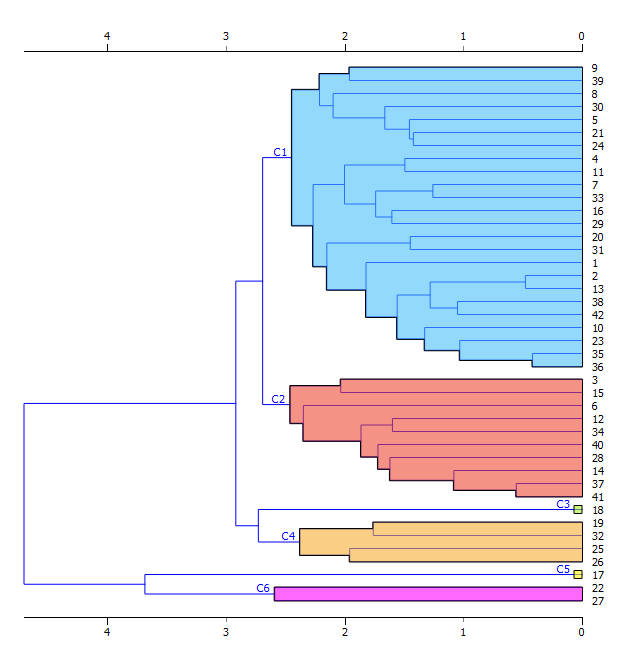

<b>Imagem 15: Histograma clusterização hierárquica treino cenário 2 e teste cenário 1</b>

#### Histogram Cluster Life - K-means

A figura abaixo mostra o histograma da divisão dos dados em clusters usando Kmeans.

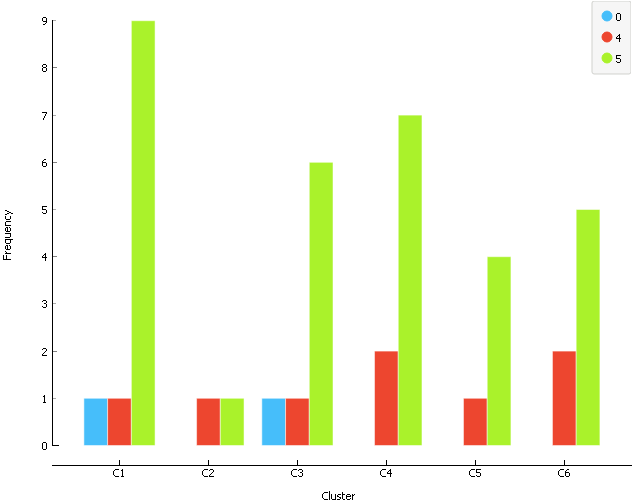

<b>Imagem 16: Histograma K-means treino cenário 2 e teste cenário 1</b>

## Treino com dados do cenário 3 e testes do cenário 1 e 2

Neste caso o cenário 3 foi usado para treinar o modelo e o 1 junto ao 2 para testar o modelo.

O esquema montado no Orange foi (Imagem 17):

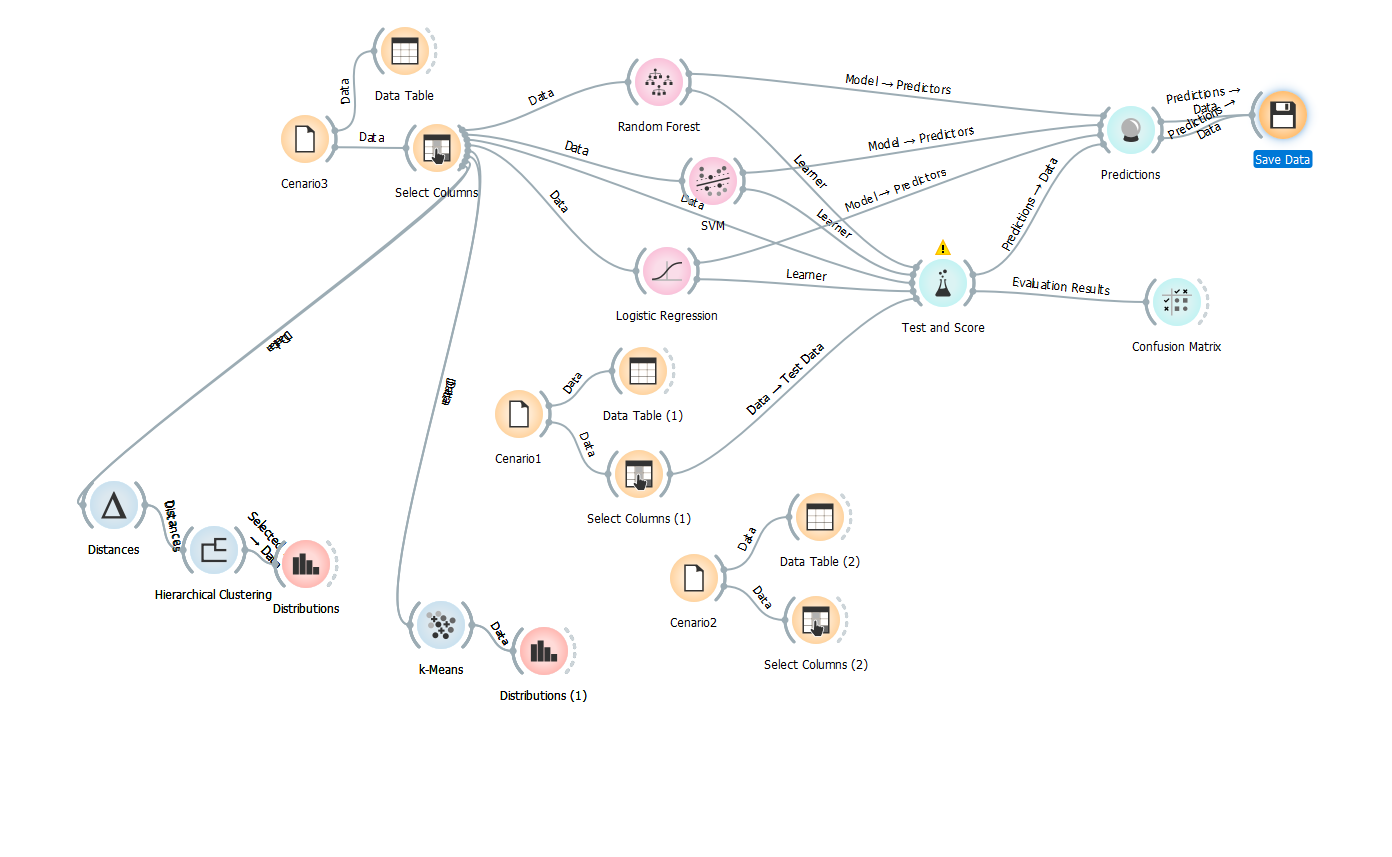

<center><b>Imagem 17: Orange (treino cenário 3 e teste cenário 1 e 2)</b></center>

### Tabela obtida

Model                 | AUC    | CA       | F1     | Precision   | Recall
----------------------|--------|----------|--------|-------------|---------
SVM                   | 0.839  | 0.701    | 0.616  | 0.771       | 0.701
Random Forest         | 0.989  | 0.893    | 0.884  | 0.890       | 0.893
Logistic Regression   | 0.637  | 0.634    | 0.515  | 0.487       | 0.634

<center><b>Tabela 8: Métricas treino cenário 3 e teste 1-2</b></center>

#### Histogram Cluster Life - Hierárquico

A imagem 18 abaixo mostra o histograma da divisão dos dados em clusters usando hierarquia.

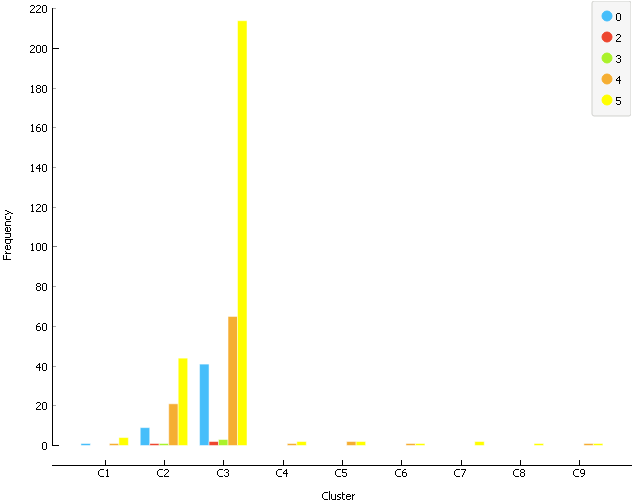

<b>Imagem 18: Histograma clusterização hierárquica treino cenário 3 e teste cenários 1-2</b>

#### Hierarquia

A figura abaixo mostra a hierarquia, em que o eixo Y representa a identificação de cada dado. Pelo dendograma é possível ver como cada cluster foi construído.

Para este foi usada uma taxa de altura de 39.2%

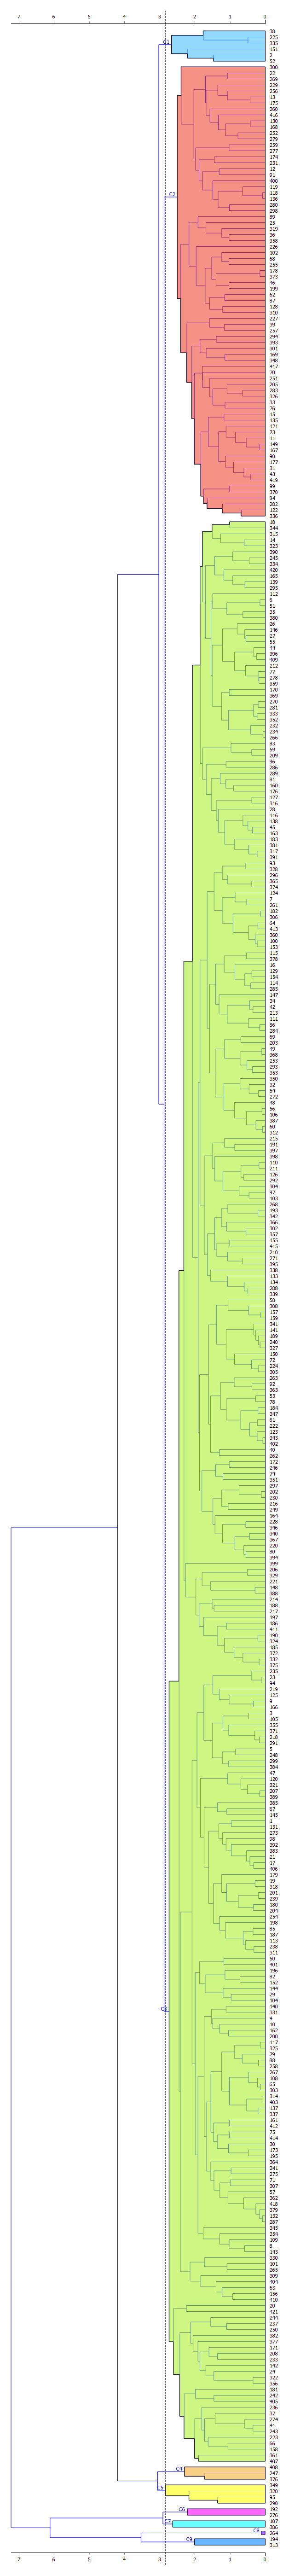

<b>Imagem 19: Histograma clusterização hierárquica treino cenário 3 e teste cenário 1-2</b>

#### Histogram Cluster Life - K-means

A figura abaixo mostra o histograma da divisão dos dados em clusters usando Kmeans.

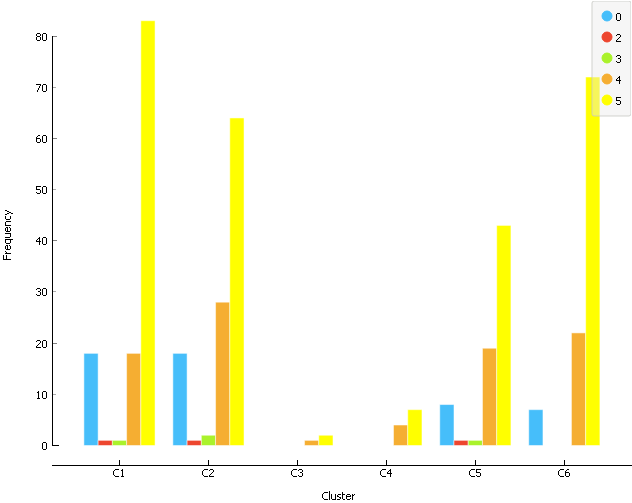

<b>Imagem 20: Histograma K-means treino cenário 3 e teste cenários 1-2</b>

# Evolução do Projeto

<p>O projeto se iniciou com a ideia de se utilizar o Python através do Google Colab para fazer a análise completa dos dados, desde o pré processamento, até à criação dos modelos de Machine Learning através da biblioteca scikit learn. Com a apresentação da ferramenta Orange data mining pelos professores e testes promissores de uso, aliado à facilidade de utilização da ferramenta optou-se por utilizá-la para a criação dos modelos de aprendizado de máquina.</p>  
<p>Durante o desenvolvimento do projeto, diversas doenças foram analisadas para serem utilizadas, no entanto, todas apresentavam poucos casos nos cenários iniciais fornecidos para o projeto (vide apêndice), fazendo com que nenhuma fosse promissora. Escolheu-se o AVC por apresentar, dentre todos os outros motivos que levaram pessoas para o hospital e que eram doenças, números mais consistentes, permitindo uma melhor análise.</p>
<p>Outro evento que houve durante o desenvolvimento do projeto foi a mudança de notação e dados escolhidos para a análise. Tinha se optado por criar várias classes binárias para registrar quanto tempo o paciente levou para morrer seguindo uma esquema semelhante a um One hot encoding. No entanto, percebeu-se que como essa informação seria usada como anotação para os modelos supervisionados, o Orange precisava de uma classe para servir como anotação, optando-se por unir todas essas classes binárias em uma classe númerica que ia de 0 a 5. Também mudou-se a forma de registrar a obesidade, inicialmente foram criadas duas colunas obesidade30 e obesidade40, porém percebeu-se que não era tão relevante diferenciar os tipos de condições, optando-se por unificar as duas colunas em uma única. Outros dados que inicialmente eram de interesse do time foram os resultados de exames laboratoriais, no entanto, não eram referentes ao período que levou os pacientes ao hospital para aquela análise, sendo portanto desatualizados e não relevantes para a produção dos modelos.</p>
<p>Para os modelos não-supervisionados foram escolhidos dois algoritmos, K-means e hierárquico. A princípio cogitou-se a utilização do método de densidade DBScan, no entanto, com os dados fornecidos, ele não produziu bons resultados, não conseguiu gerar mais de um cluster, portanto esta análise foi abandonada.</p>
<p>Outro problema encontrando foi que quando os cenários 3 e 4 foram lançados, desejou-se usá-los para melhorar os resultados do projeto, no entanto, o cenário 4 possuía tantos dados, que o arquivo ficou muito grande e foi tecnicamente impossível processá-los para utilização, tendo em vista o hardware disponível para o projeto.</p>


# Discussão

Duas tentativas de análise foram feitas considerando as possibilidades de target. Na primeira, procurou-se dividir quando ocorreu o óbito em colunas binárias, falando se morreu no intervalo ou não. No segundo caso, em apenas uma coluna, o intervalo de óbito foi diferenciado através de valores. Para o Orange, o uso de apenas uma coluna demonstrou ser mais interessante para a análise, de modo que as colunas binárias para classificação do periodo de óbito não foram utilizadas.

Com base nos resultados, observou-se que comparando o cenário em que um é treinado e o outro usado para testar, quando o cenário 2 é usado para treino e o 1, para teste, as métricas foram melhores para as três técnicas utilizadas (SVM, Random Forest, Logistic Regression). Isto possivelmente ocorreu porque o cenário 1 possui mais dados de óbito que o cenário 2, e portanto, o modelo que utilizou os dados do cenário 2 pode ter caído nos problemas de underfitting ou overfitting. Outra possível causa é em virtude da quantidade pequena de dados,  pouco diversificados e com somente alguns relatos de mortes, como visto no cenário 2, o problema caiu num caso de classificação binária. Deste modo, como pode ser obeservado para a técnica de logistic regression, apresentou resultados piores em todos os cenários, exceto naqueles que usaram dados do cenário 1 para treino e 2 para validação e teste e vice-versa.

O resultado foi melhor no caso em que os dados do cenário 2 foram usados para treino, sendo este é o mais "binário" de todos os cenários.

Os resultados obtidos para os cenários análisados são mostrados a seguir. 

Treino e teste a partir dos cenários 1 e 2

Model                 | AUC    | CA       | F1     | Precision   | Recall
----------------------|--------|----------|--------|-------------|---------
SVM                   | 0.892  | 0.798    | 0.754  | 0.810       | 0.798
Random Forest         | 0.988  | 0.881    | 0.869  | 0.879       | 0.881
Logistic Regression   | 0.703  | 0.631    | 0.519  | 0.485       | 0.631

Treino e teste a partir dos cenários 1, 2 e 3

Model                 | AUC    | CA       | F1     | Precision   | Recall
----------------------|--------|----------|--------|-------------|---------
SVM                   | 0.820  | 0.689    | 0.595  | 0.771       | 0.689
Random Forest         | 0.988  | 0.883    | 0.874  | 0.895       | 0.883
Logistic Regression   | 0.623  | 0.634    | 0.521  | 0.491       | 0.634

Treino com dados do cenário 1 e testes do cenário 2

Model                 | AUC    | CA       | F1     | Precision   | Recall
----------------------|--------|----------|--------|-------------|---------
SVM                   | 0.831  | 0.762    | 0.720  | 0.742       | 0.762
Random Forest         | 0.791  | 0.571    | 0.498  | 0.576       | 0.571
Logistic Regression   | 0.982  | 0.833    | 0.819  | 0.818       | 0.833

Treino com dados do cenário 2 e testes do cenário 1

Model                 | AUC    | CA       | F1     | Precision   | Recall
----------------------|--------|----------|--------|-------------|---------
SVM                   | 0.804  | 0.952    | 0.948  | 0.955       | 0.952
Random Forest         | 0.987  | 0.929    | 0.906  | 0.887       | 0.929
Logistic Regression   | 0.932  | 0.905    | 0.880  | 0.868       | 0.905

Treino com dados do cenário 3 e testes do cenário 1 e 2

Model                 | AUC    | CA       | F1     | Precision   | Recall
----------------------|--------|----------|--------|-------------|---------
SVM                   | 0.839  | 0.701    | 0.616  | 0.771       | 0.701
Random Forest         | 0.989  | 0.893    | 0.884  | 0.890       | 0.893
Logistic Regression   | 0.637  | 0.634    | 0.515  | 0.487       | 0.634

A resposta para a pergunta inicial, "é possível prognosticar previamente quando um paciente vai morrer?", pelos dados obtidos no projeto é sim. Em todos os casos analisados, houve um modelo com acurácia, precisão e sensibilidade acima de 80%, muitos na verdade já em 90% com um algarismo significativo. Isso mostra que, fornecendo os dados selecionados pelo time aos modelos produzidos, um médico poderia saber com 90% de certeza se seu paciente morreria pelo AVC que ele teve e em quanto tempo essa morte se daria, especialmente se ocorreria no dia em que a doença foi diagnosticada.

A análise dos dados obtidos pelos modelos não supervisionados não chegou a resultados conclusivos, tendo que vista que a classificação dos dados nos clusters (Imagens 2, 4, 6, 8, 10, 12, 14, 16, 18, 20) não apresentou coerência com o esperado, isto é, em um mesmo cluster houveram dados de diferentes períodos de óbito, portanto a classificação não foi efetiva.

# Conclusão

## Destacar as principais conclusões obtidas no desenvolvimento do projeto

*   Uma quantidade maior de dados é melhor para os testes, deixando o modelo mais robusto.
*   Destacar os parâmetros chave para o machine learning ajuda o modelo a ter melhor predição
*   Dados que possuem alta correlação possuem comportamento próximo e geram pouco impacto para o machine learning, por exemplo, idade e quantidade de encontros. 
*   O melhor resultado foi obtido no modelo de random forest que utilizou dados do cenário 3 e validação e teste com os dados dos cenários 1 e 2. Apesas das métricas do caso em que o treino foi feito com dados do cenário dois e o teste com o cenário 1 serem melhores, como esse modelo usa poucos dados tanto para treino, quanto para teste e validação, há uma grande chance desse modelo estar passando por problemas de over ou underfitting. Já o modelo de treino com o cenário 3 possui uma quantidade consistente de dados e as métricas demonstram um resultado muito promissor, o que demonstra que esse caso produziu os melhores resultados.
*   Houveram diferenças significativas com o uso de modelos diferentes, um método para se análisar as diferenças foi através dos resultados para Area Under ROC Curve (capacidade que o modelo tem de distringuir entre duas classes, quanto maior a área sobre a curva, melhor a performance do modelo), Classification Accuracy, Precision, F1 (Média harmônica entre precisão e recall, calculado por: F1 = 2x(Precision x Recall)/(Precision + Recall)) e Recall (Taxa de verdadeiros positivos sobre o total de todos os valores que deveriam ser positivos, também conhecido como sensibilidade). 

## Destacar os principais desafios enfrentados

*   Definição dos parâmetros que seriam destacados para a criação dos modelos. 
*   Testes com diferentes modelos de machine learning para se encontrar o que apresenta melhores resultados. 
*   Ajustes dos parâmetros dos modelos usados para a análise. 
*   Análise e compreensão dos resultados gerados pelo machine learning.
*   Dificuldade de encontrar dados laboratoriais referentes ao encontro em que o paciente foi diagnosticado com a doença, sendo que dados de interesse como pressão arterial e colesterol LDL provavelmente teriam impacto nos resultados para o momento. 

## Principais lições aprendidas

O uso de ferramentas como o Orange ajudam à realizar uma pré análise dos dados com diferentes modelos de classificação para o machine learning, uma vez que se tenham estes dados, é possivel criar modelos em Python para fazer as análises (no caso, a criação em Python ficou como trabalho futuro).

Quando trabalhando com quantidades de dados muito grandes, como é o caso do cenário 4, observa-se o quanto é importante ter uma máquina potente para a realização da tarefa, visto que esta consome muitos recursos de memória e disco.

## Trabalhos Futuros

O primeiro item que poderia ser feito é refazer a análise considerando o cenário 4. Infelizmente, com o uso do colab pelo navegador, não há recursos de disco e memória suficientes para gerar a tabela para o cenário 4, portanto é interessante rodar o colab localmente no computador e gerar a tabela para este cenário.

Tendo mais um cenário, refazer as análises e verificar se há melhoras nos resultados. Analisando o que foi obtido com os cenários 1, 2 e 3, foi possível gerar e treinar modelos com base na quantidade de dados disponíveis nestes cenários, havendo mais dados, resultados melhores podem ser obtidos.

Fazer um estudo combinando diferentes paradigmas de aprendizado de máquina (supervisionado ou nao supervisionado) pode trazer ganho. Além de comparar os resultados produzidos com as duas técnicas, podemos complementar o conhecimento produzido por cada uma delas, uma vez que a análise não supervisionada gera modelos não préviamente conhecidos, que podem não ser relacionados às previsões produzidas em métodos supervisionados. 

Tendo resultados de análises feitas no Orange, utilizar a biblioteca scikit learn para fazer uma análise mais aprofundada e produzir resultados ainda melhores e mais explorados.

Tomar os modelos produzidos e fazer análises exploratórias para encontrar quais características mais influenciam na classificação, podendo dessa forma informar os médicos quais dados de um paciente são mais importantes na hora do prognóstico.

Explorar os clusters produzidos e encontrar quais características produziram estes agrupamentos e dessa forma entender como essas características podem se aplicar nos prognósticos.

Refazer os treinamentos e testes no Python e procurar mais dados para testes. Uma vez que o modelo fosse bastante validado e seus resultados melhorem, procurar um hospital que aceite fazer um teste com o software produzido.




# Referências Bibliográficas

[1] WHO, World Health Organization. Disponível em: http://www.emro.who.int/health-topics/stroke-cerebrovascular-accident/index.html. Acessado em: 16 de maio de 2022;

[2] Oliveira, G M M de, et al. "Estatística Cardiovascular–Brasil 2021." Arquivos Brasileiros de Cardiologia 118 (2022): 115-373. doi: https://doi.org/10.36660/abc.20211012

[3] Donnan G A, Fisher M, Macleod M, Davis S M. Stroke. Lancet (2008) 10; 371(9624):1612-23. doi: https://doi.org/10.1016/S0140-6736(08)60694-7.

[4] BVS, Biblioteca Virtual em Saúde, Ministério da Saúde (2015). Disponível em: https://bvsms.saude.gov.br/avc-acidente-vascular-cerebral/. Acessado em: 16 de maio de 2022;

[5] CDC, Centers for Disease Control and Prevention (2018). Disponível em: https://phinvads.cdc.gov/vads/ViewCodeSystemConcept.action?oid=2.16.840.1.113883.6.96&code=230690007. Acessado em: 12 de maio de 2022.


# Appendix
## Definindo a doença a ser analizada

Para se definir qual doença será considerada, uma primeira análise é verificar a quantidade de medidas para cada doença, considerando como referência a quantidade de *encounters*.

Abaixo é analizado a quantidade de casos para cada tipo de encontro

In [ ]:
encounter_code = encounter.drop_duplicates(subset=['CODE'])

print("O numero de doenças que constam no registro é de " + str(len(encounter_code)))
print("As doenças que constam e a quantidade de medidas é: ")

encounter_code_quantity = pd.DataFrame()
encounter_code_quantity['CODE'] = encounter_code['CODE']
encounter_code_quantity['DESCRIPTION'] = encounter_code['DESCRIPTION']
quantity_list = []
for measure in list(encounter_code['CODE']):
  quantity_list.append(len(encounter[encounter['CODE'] == measure]))

encounter_code_quantity['QUANTITY'] = quantity_list
encounter_code_quantity = encounter_code_quantity.reset_index()
display(encounter_code_quantity)

O numero de doenças que constam no registro é de 53
As doenças que constam e a quantidade de medidas é: 


,index,CODE,DESCRIPTION,QUANTITY
0,0,410620009,Well child visit (procedure),4682
1,2,185345009,Encounter for symptom,4060
2,11,50849002,Emergency room admission (procedure),1222
3,12,185347001,Encounter for problem,4256
4,15,702927004,Urgent care clinic (procedure),2341
5,17,185349003,Encounter for check up (procedure),5254
6,18,394701000,Asthma follow-up,329
7,47,33879002,Administration of vaccine to produce active im...,1359
8,88,698314001,Consultation for treatment,1363
9,97,162673000,General examination of patient (procedure),16702


Com base no resultado desta tabela, focando em quantidade de casos por tipo de encontro, e nas doenças que apresentam maior risco de óbito, foi escolhido o AVC.